# Đồ án môn Phân tích dữ liệu

# Import Thư viện


# Bước 1: Chuẩn bị dữ liệu

## 1.1 Load dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ki2Nam3/PhanTichDuLieu/DoAn/adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1.2 Kiểm tra dữ liệu

### 1.2.1 Thông tin các thuộc tính

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1.2.2 Các cột trong DataFrame bao gồm:
1. **age**: Độ tuổi của cá nhân.
2. **workclass**: Loại công việc hoặc ngành nghề của cá nhân.
3. **fnlwgt**: Trọng số cuối cùng (final weight), một chỉ số trong một tổng thể lớn cho mẫu dân số.
4. **education**: Trình độ học vấn của cá nhân.
5. **educational-num**: Số lượng năm học hoặc mức độ học vấn của cá nhân.
6. **marital-status**: Tình trạng hôn nhân của cá nhân.
7. **occupation**: Nghề nghiệp của cá nhân.
8. **relationship**: Mối quan hệ của cá nhân trong gia đình.
9. **race**: Chủng tộc của cá nhân.
10. **gender**: Giới tính của cá nhân.
11. **capital-gain**: Thu nhập vốn
12. **capital-loss**: Thiệt hại từ tài sản của cá nhân.
13. **hours-per-week**: Số giờ làm việc mỗi tuần của cá nhân.
14. **native-country**: Quốc gia gốc của cá nhân.
15. **income**: Thu nhập của cá nhân.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### 1.2.3 Kiểm tra dữ liệu null

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### 1.2.4 Kiểm tra dữ liệu NaN

In [ ]:
df[df == '?'] = np.nan
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### 1.2.5 Chia thành 2 list categorical và numerical

In [ ]:
cat_cols= df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical Variables:
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### 1.2.6 Kiểm tra giá trị ngoại biên (outlier)

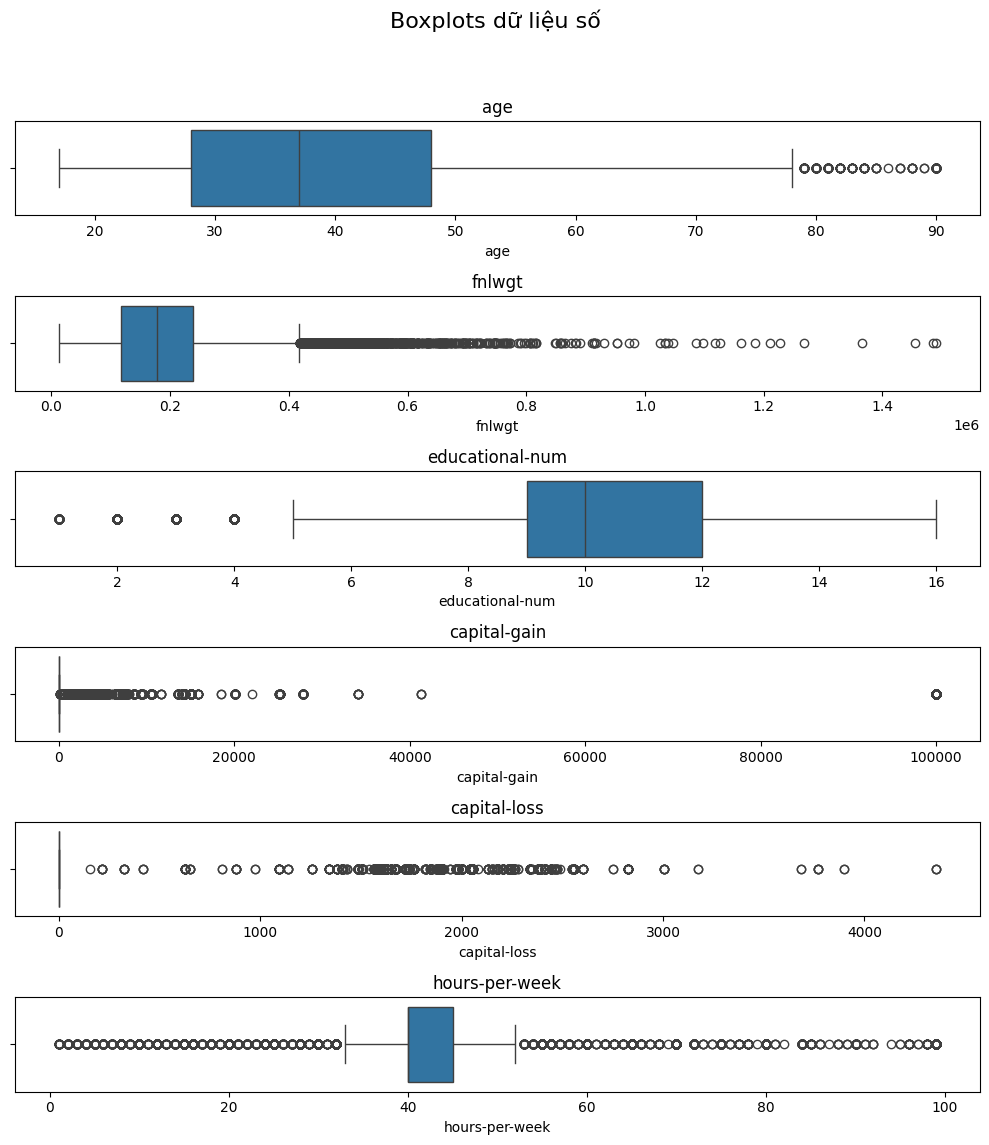

In [ ]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 12))
fig.suptitle('Boxplots dữ liệu số', fontsize=16)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Nhận xét:
- Xuất hiện nhiều giá trị outlier, phân bố không đều

#### Xử lý outlier

In [ ]:
df = df[df.age < 80]

In [ ]:
df = df[df['educational-num'] > 5]


In [ ]:
df = df[(df['capital-gain'] < 20000) & (df['capital-gain'] > 1500)]


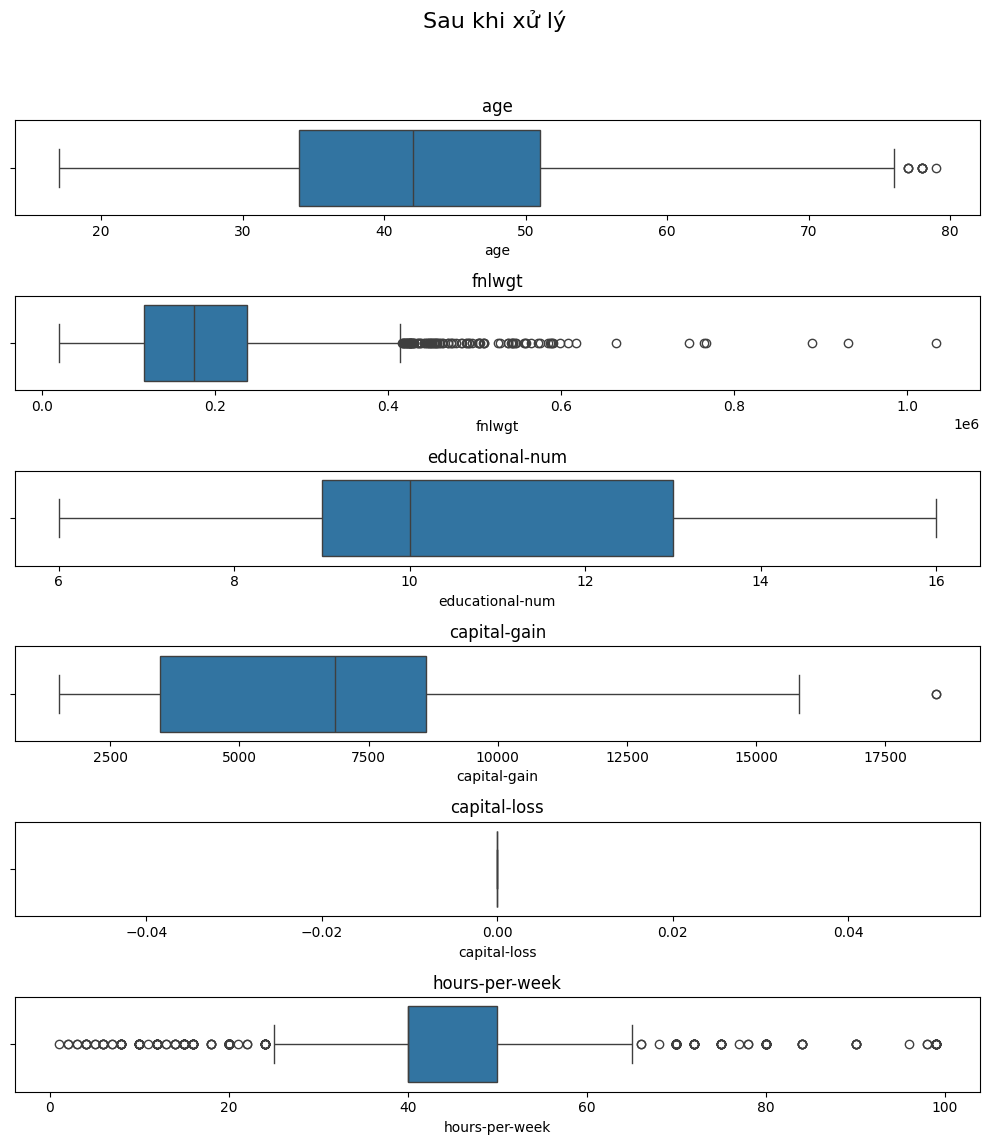

In [ ]:

fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 12))
fig.suptitle('Sau khi xử lý', fontsize=16)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Nhận xét:
- Sau khi xử lí đã giảm bớt đáng kể giá trị outlier

## 1.2.7 Đặt vấn đề cần phân tích về dữ liệu:
1. Hầu hết dân số thuộc quốc gia nào?
2. Người lao động chủ yếu thuộc vào độ tuổi nào?
3. Có sự khác biệt gì về thu nhập khi chưa kết hôn và kết hôn không?
4. "Người có trình độ học vấn cao hơn thường có thu nhập cao hơn không? Liệu mối quan hệ này có sự khác biệt giữa nam và nữ không?"
5. Có sự khác biệt về mức thu nhập giữa những người làm việc full-time và part-time không?
6. Hầu hết dân số đều đã lập gia đình?
7. Nam và nữ ai có thu nhập >50K cao hơn?
8. Phân phối của các trình độ học vấn trong tập dữ liệu như thế nào?
9. Phân phối giới tính trong tập dữ liệu là như thế nào?
10. Mối quan hệ có ảnh hưởng đến thu nhập không?
11. Phân phối của thu nhập (income) trong các nhóm tuổi (age) khác nhau như thế nào?
12. Phân phối dữ liệu người lao động theo chủng tộc (race) trong bộ dữ liệu như thế nào?
13. Phân phối dữ liệu số giờ làm việc của người lao động trong bộ dữ liệu như thế nào?
14. Có mối tương quan nào giữa số giờ làm việc hàng tuần (hours-per-week) và thu nhập (income) không?
15. Phân bố dữ liệu lợi nhuận từ tài sản cá nhân của người lao động như thế nào?
16. Liệu mối quan hệ hôn nhân có ảnh hưởng đến số giờ làm việc hàng tuần (hours-per-week) không?
17. Có mối tương quan nào giữa 2 biến educational-num (trình độ học vấn) và capital-gain (lợi nhuận từ tài sản cá nhân hay không)?
18. "Phân phối thu nhập của người lao động được thu thập được trong bộ dữ liệu như thế nào?"
19. Có mối tương quan nào giữa 2 biến capital-gain và income hay không?
20. "Phân phối thu nhập của các mối quan hệ gia đình (relationship) khác nhau như thế nào?"
21. Phân phối các loại công việc và ngành nghề (work-class) như thế nào?
22. Phân phối độ tuổi với các mối quan hệ gia đình như thế nào?
23. Phân phối dữ liệu giữa số giờ làm việc hàng tuần với mối quan hệ gia đình (relationship) như thế nào?
24. Phân phối lợi nhuận từ tài sản cá nhân (capital-gain) của người lao động của bộ dữ liệu như thế nào?


# Bước 2: Phân tích Univariate-Bivariate-Multivariate

## 2.1 Unvariate

### 2.1.1 Sử dụng histogram và biểu đồ hộp cho các biến liên tục (numerical)

age
Skew : 0.38


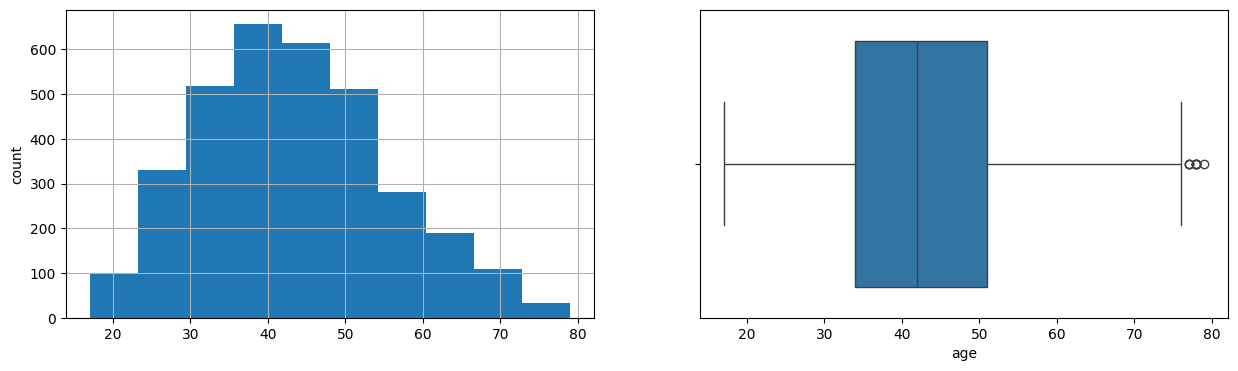

fnlwgt
Skew : 1.31


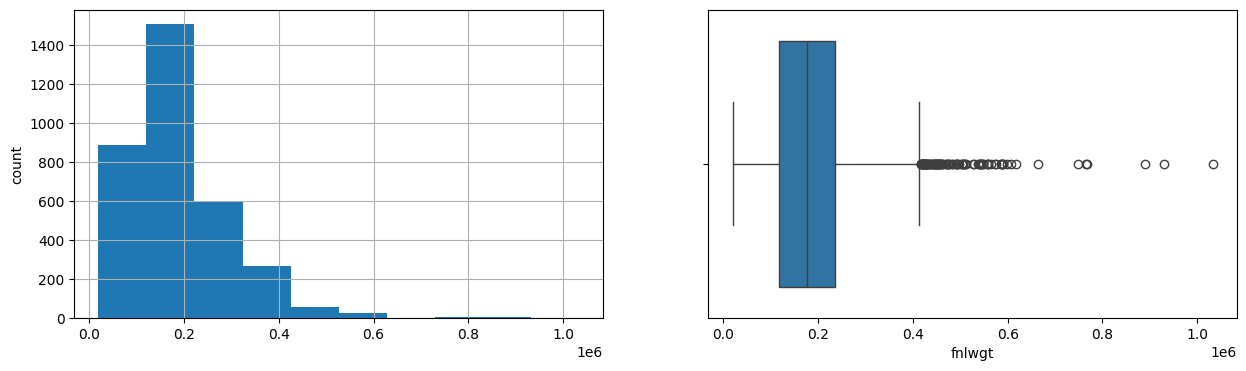

educational-num
Skew : 0.15


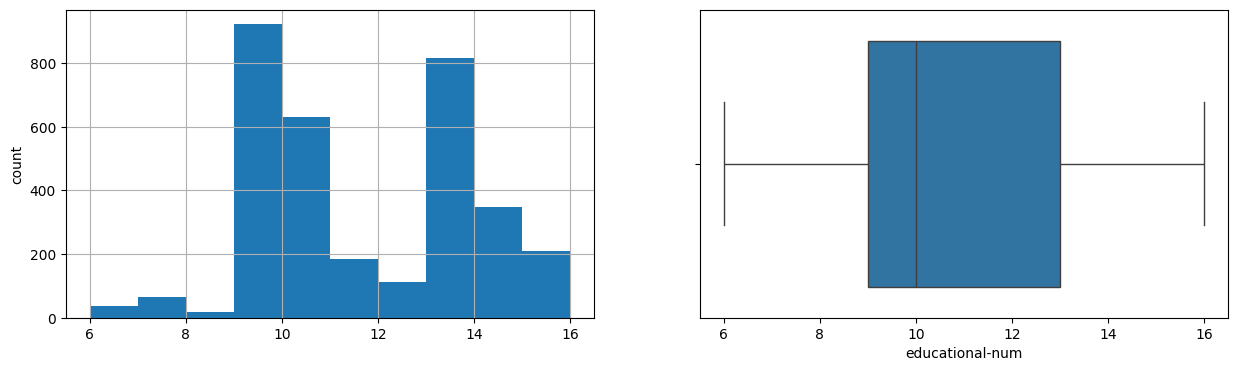

capital-gain
Skew : 0.78


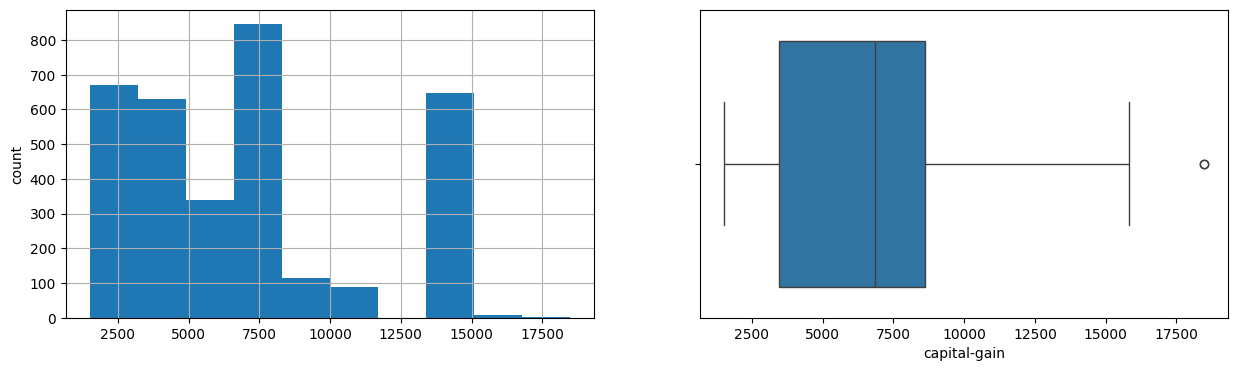

capital-loss
Skew : 0


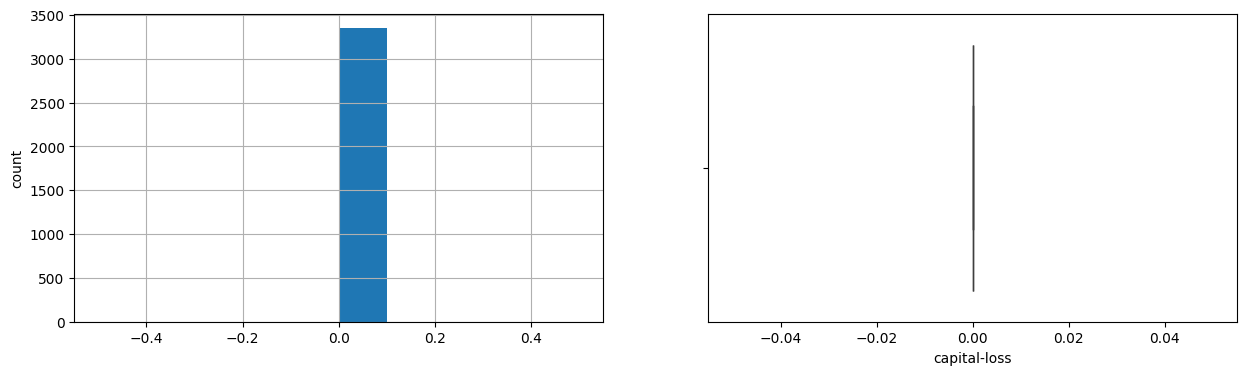

hours-per-week
Skew : 0.51


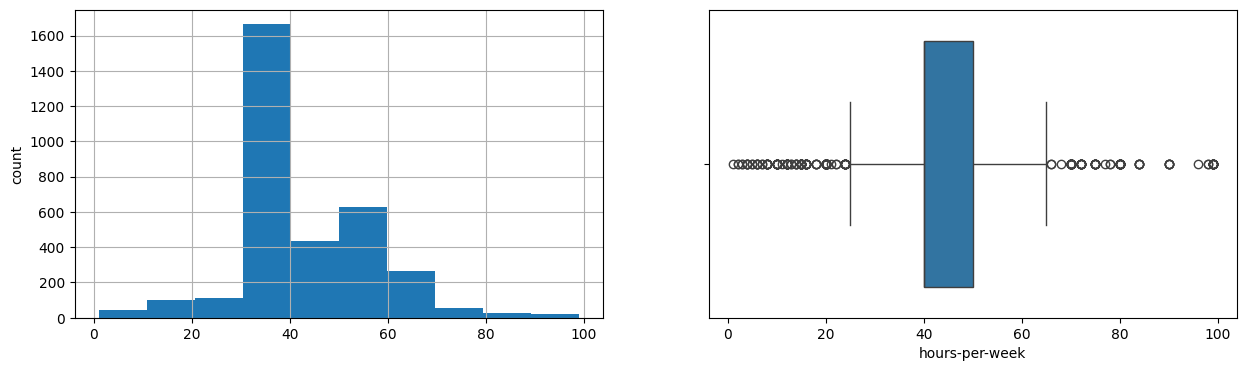

In [ ]:
for col in num_cols:
  print(col)
  print('Skew :', round(df[col].skew(), 2))                                     # Skew cho biết độ lệch của biểu đồ
  plt.figure(figsize = (15, 4))                                                 # Nếu Skew dương thì biểu đồ lệch phải, phần lớn giá trị nhỏ hơn vị trí trung bình, 1 vài giá trị ngoại biên lớn hơn trung bình, mean sẽ lớn hơn trung vị (median)
  plt.subplot(1, 2, 1)                                                           # Nếu Skew âm thì ngược lại
  df[col].hist(grid=True)                                                       # Nếu Skew bằng 0 là phân phối chuẩn
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[col])
  plt.show()

#### Nhận xét
1. Biến Age, từ biểu đồ ta có thể thấy số lượng dân số tập trung nhiều nhất từ nhóm 20 đến hơn 40 tuổi. Số người già trên 60 giảm dần
2. Biến fnlwgt, thể hiện phân phối thu nhập/lương của dân số.
3. Biến educational-num, từ hình ta có thể thấy đa số dân số đều đã học từ 8-12 năm.
4. Biến capital-gain thể hiện giàu có của dân số, với đa số tập trung ở mức trung bình, trong khi có một bộ phận nhỏ rất giàu có (phần phân phối lệch phải).
5. Biến capital-loss cho ta thấy đa phần đều không có tổn thất.
6. Biến hours-per-week cho ta thấy đa phần dân số dành 30-40h trong tuần cho công việc

### 2.1.2 Sử dụng countplot và biểu đồ tròn để các biến categorical

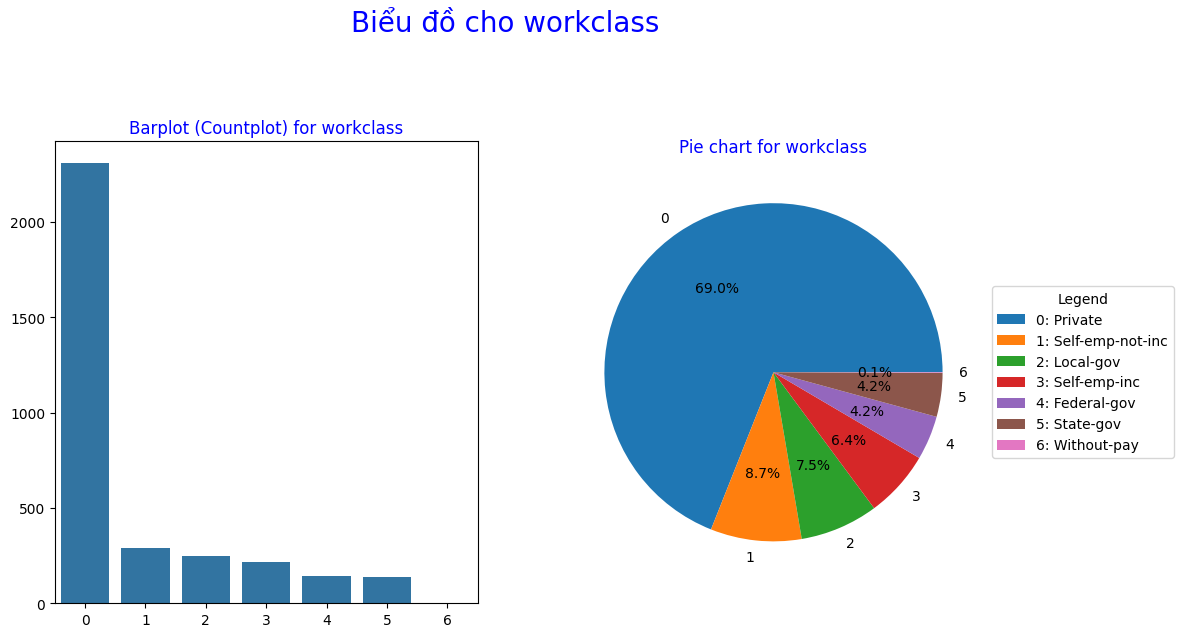

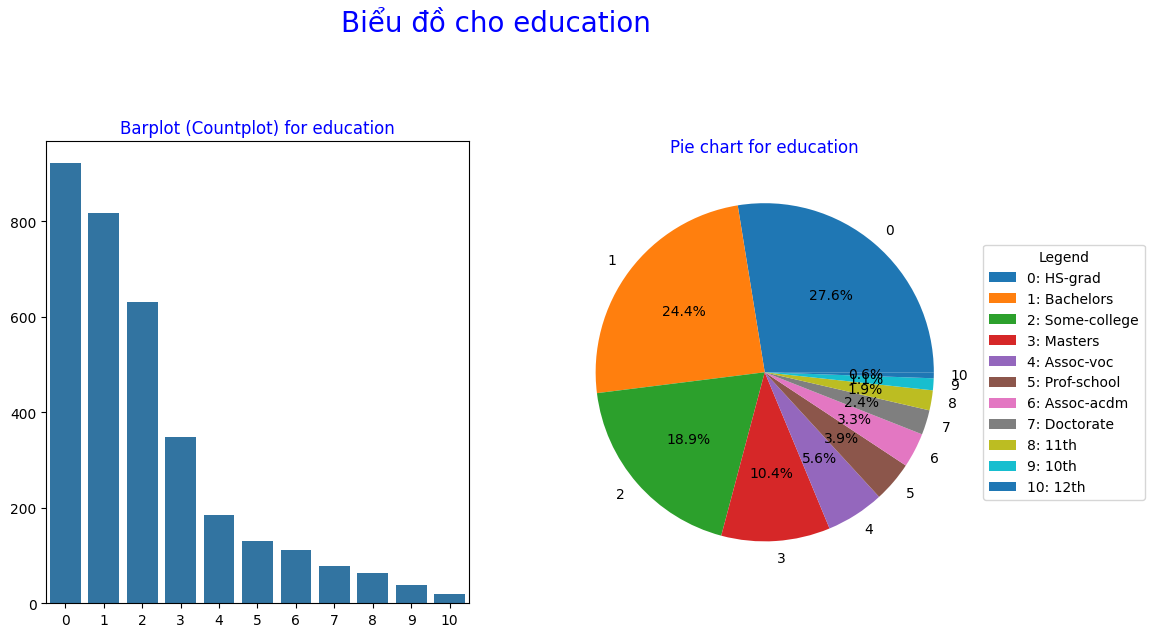

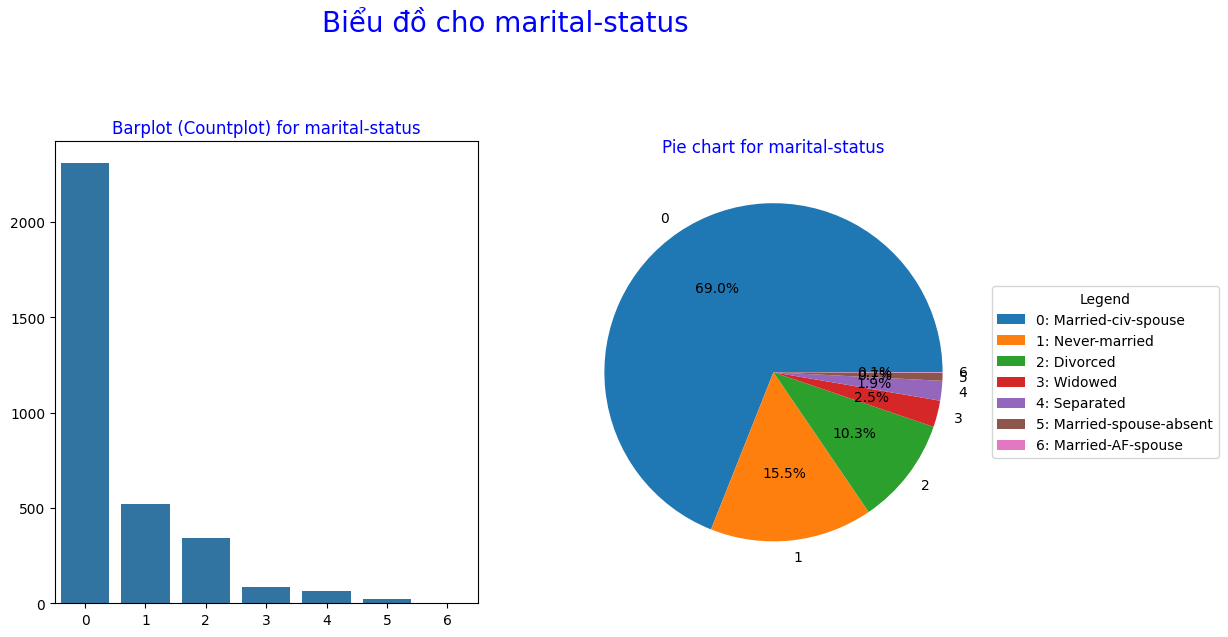

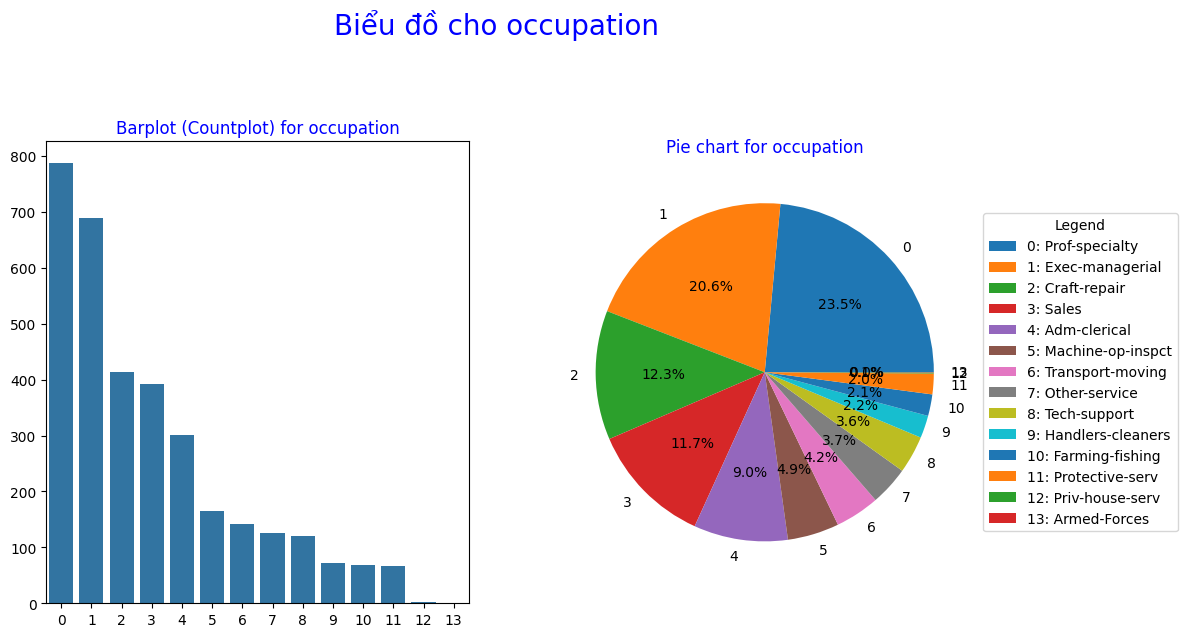

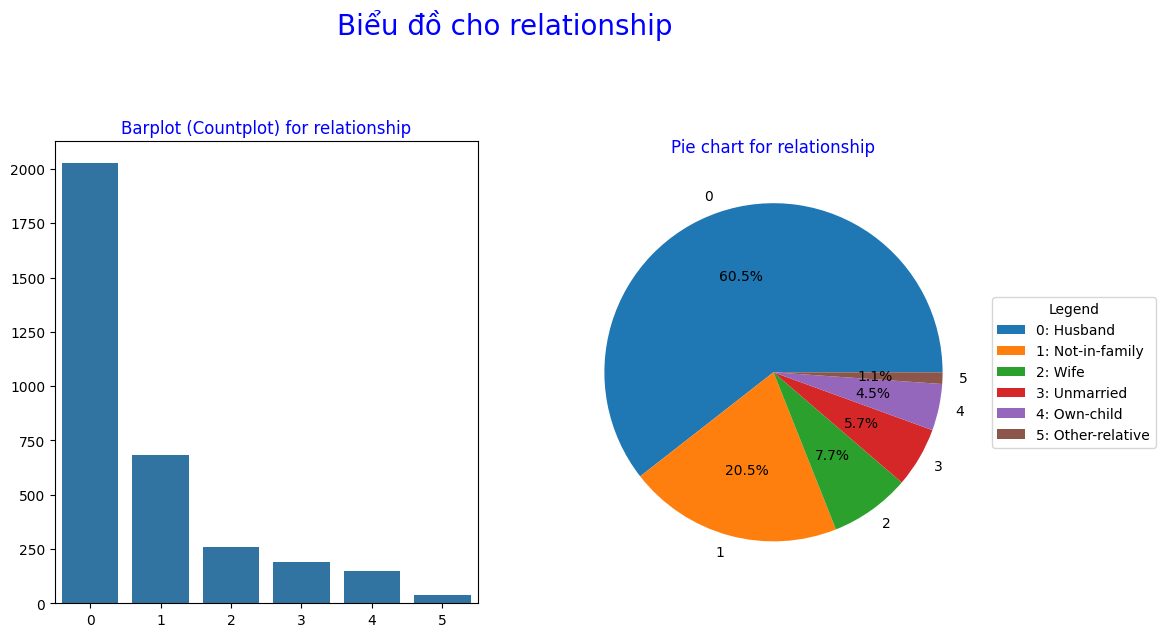

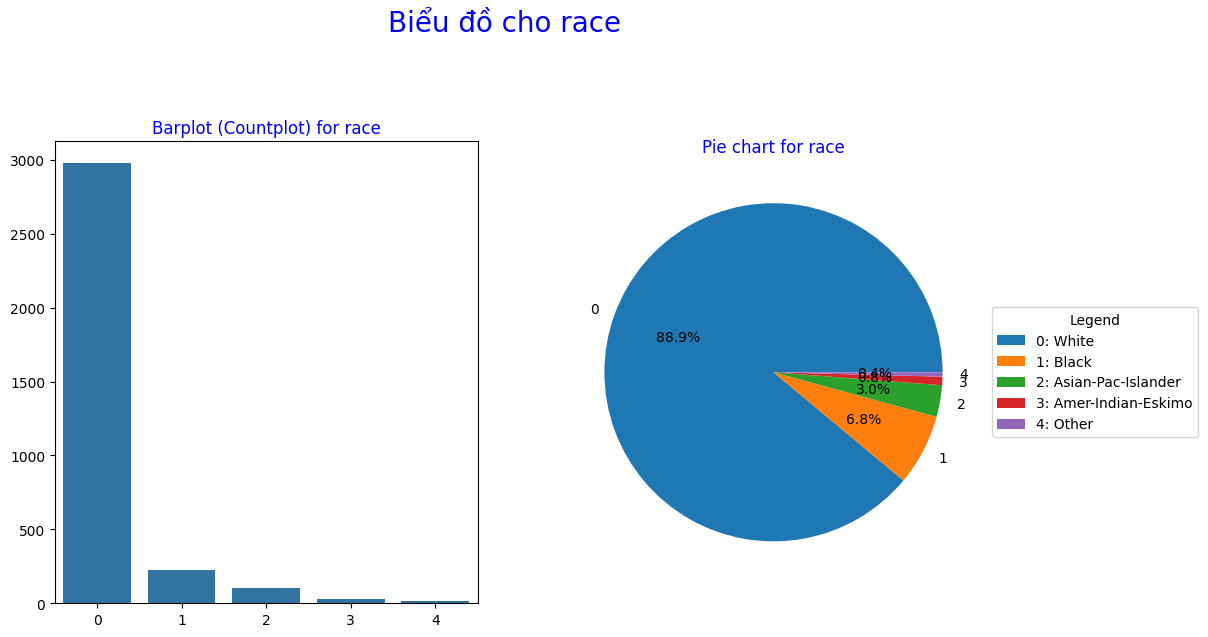

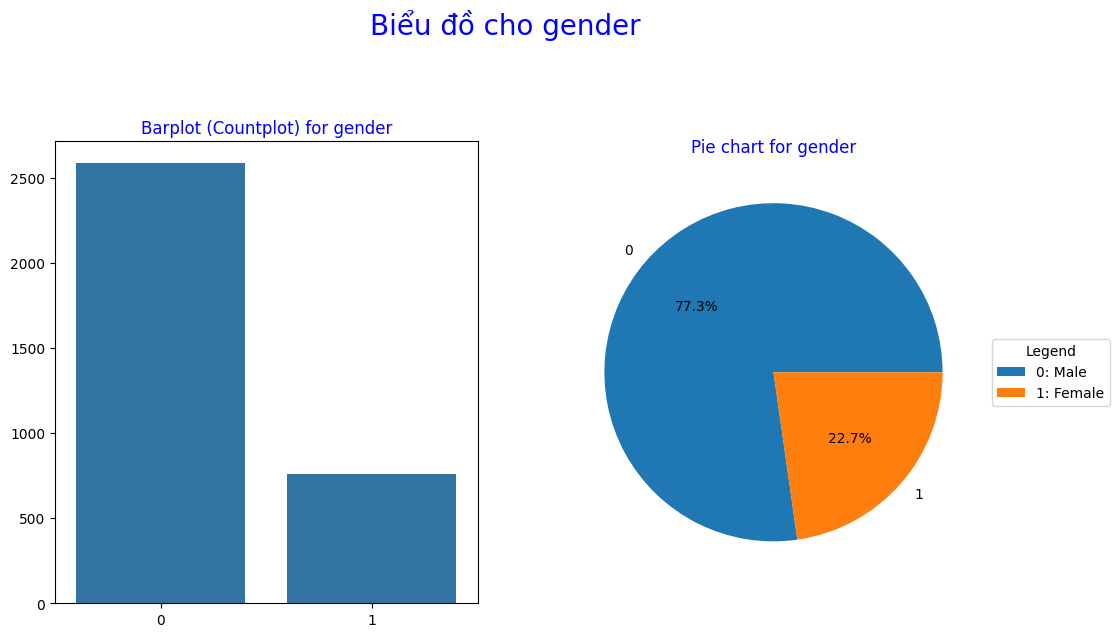

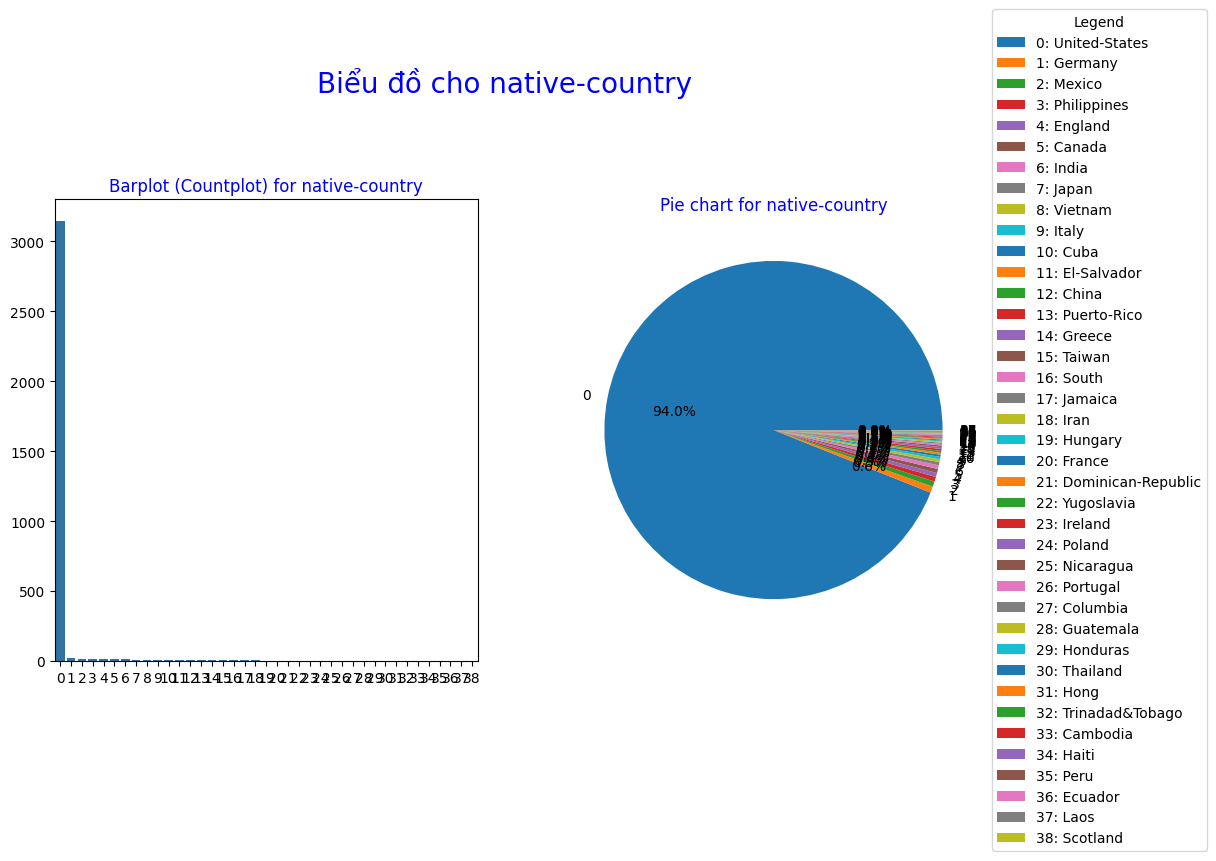

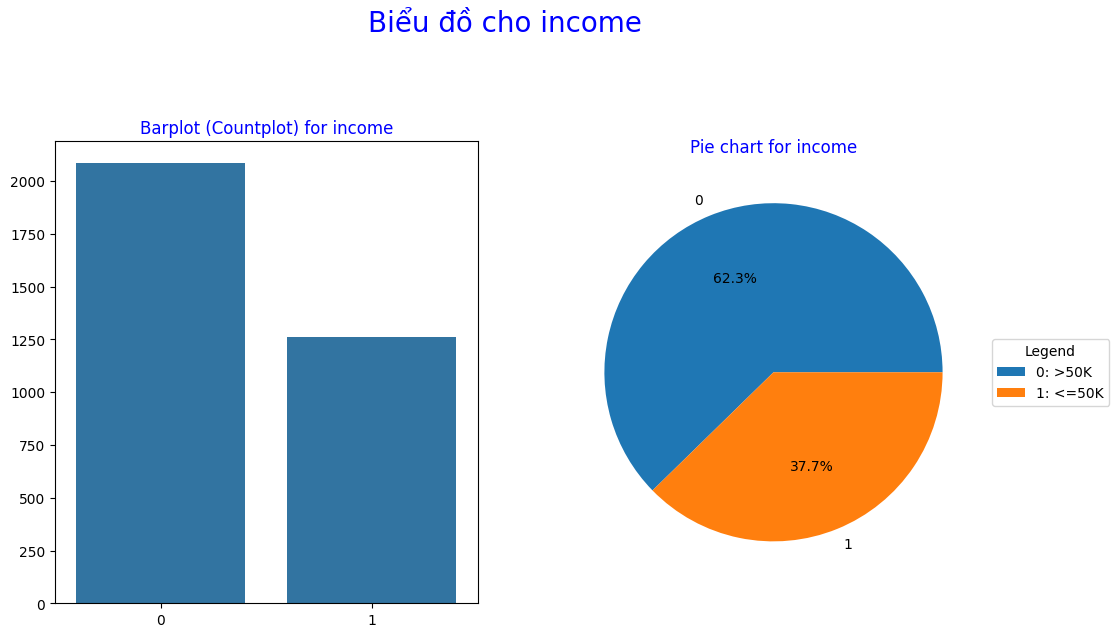

In [ ]:
# Lặp qua các cột dạng categorical
for col in cat_cols:
    q = df[col].value_counts()

    # Ánh xạ giá trị categorical thành số
    mapping = {label: index for index, label in enumerate(q.index)}
    q_values = [mapping[label] for label in q.index]
    q_labels = [f"{value}" for value in q_values]  # Chỉ hiển thị giá trị số

    # Tạo từ điển giải thích ý nghĩa của các số
    if 'legend_labels' not in locals():
        legend_labels = {value: label for label, value in mapping.items()}
    else:
        legend_labels.update({value: label for label, value in mapping.items()})

    # Tạo subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Biểu đồ countplot
    sns.barplot(x=q_labels, y=q.values, ax=axes[0])
    axes[0].set_title(f'Barplot (Countplot) for {col}', color='blue')

    # Biểu đồ tròn
    axes[1].pie(q.values, autopct='%1.1f%%', labels=q_labels)
    axes[1].legend(labels=[f"{value}: {legend_labels[value]}" for value in sorted(legend_labels.keys())],
                   title="Legend", loc="center left", bbox_to_anchor=(1, 0.5))
    axes[1].set_title(f'Pie chart for {col}', color='blue')

    # Tiêu đề chung
    fig.suptitle(f'Biểu đồ cho {col}', color='blue', fontsize=20, y=1.1)

    # Hiển thị biểu đồ
    plt.show()

#### Nhận xét
1. Biến work-class cho ta thấy đa phần mọi người chọn làm việc tự nhân chiếm đến 75%
2. Biến education biểu diễn trình độ học của dân số trong đó đa phần đã tốt nghiệp trung học phổ thông, một số thì đang học đại học.
2. Biến marital-status, chỉ chưa tới 50% dân số kết hôn và có 33% dân số độc thân có thể thấy tỉ lệ độc thân ở đất nước này khá cao
4. Biến occupation, đa phần nghề nghiệp đòi hỏi trình độ chuyên môn cao chiếm phần lớn.
5. Biến relationship chiếm phần lớn là chồng nhưng vợ chỉ chiếm gần 5% cho ta thấy sự chênh lệch. Cho thấy tình trạng hôn nhân đơn thân cao(chỉ có chồng không có vợ)
6. Biến race người da trắng chiếm đến 85.5% dân số
7. Biến gender đa số dân số là đàn ông
8. Biến native-country, chiếm phần lớn người lao động thuộc nước Mỹ đây có thể là dữ liệu dân số của mỹ
9. Biến income cho thấy sự chênh lệch, số người kiếm được >50K chiếm 23.9%

### 2.1.3 Ma trận tương quan

In [ ]:
df_mx = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
def Label_Encoder(df,cat_cols):
  label_encoders = {}
  for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
Label_Encoder(df_mx,cat_cols)

In [ ]:
df_mx = df_mx.drop('capital-loss', axis=1)

<Axes: >

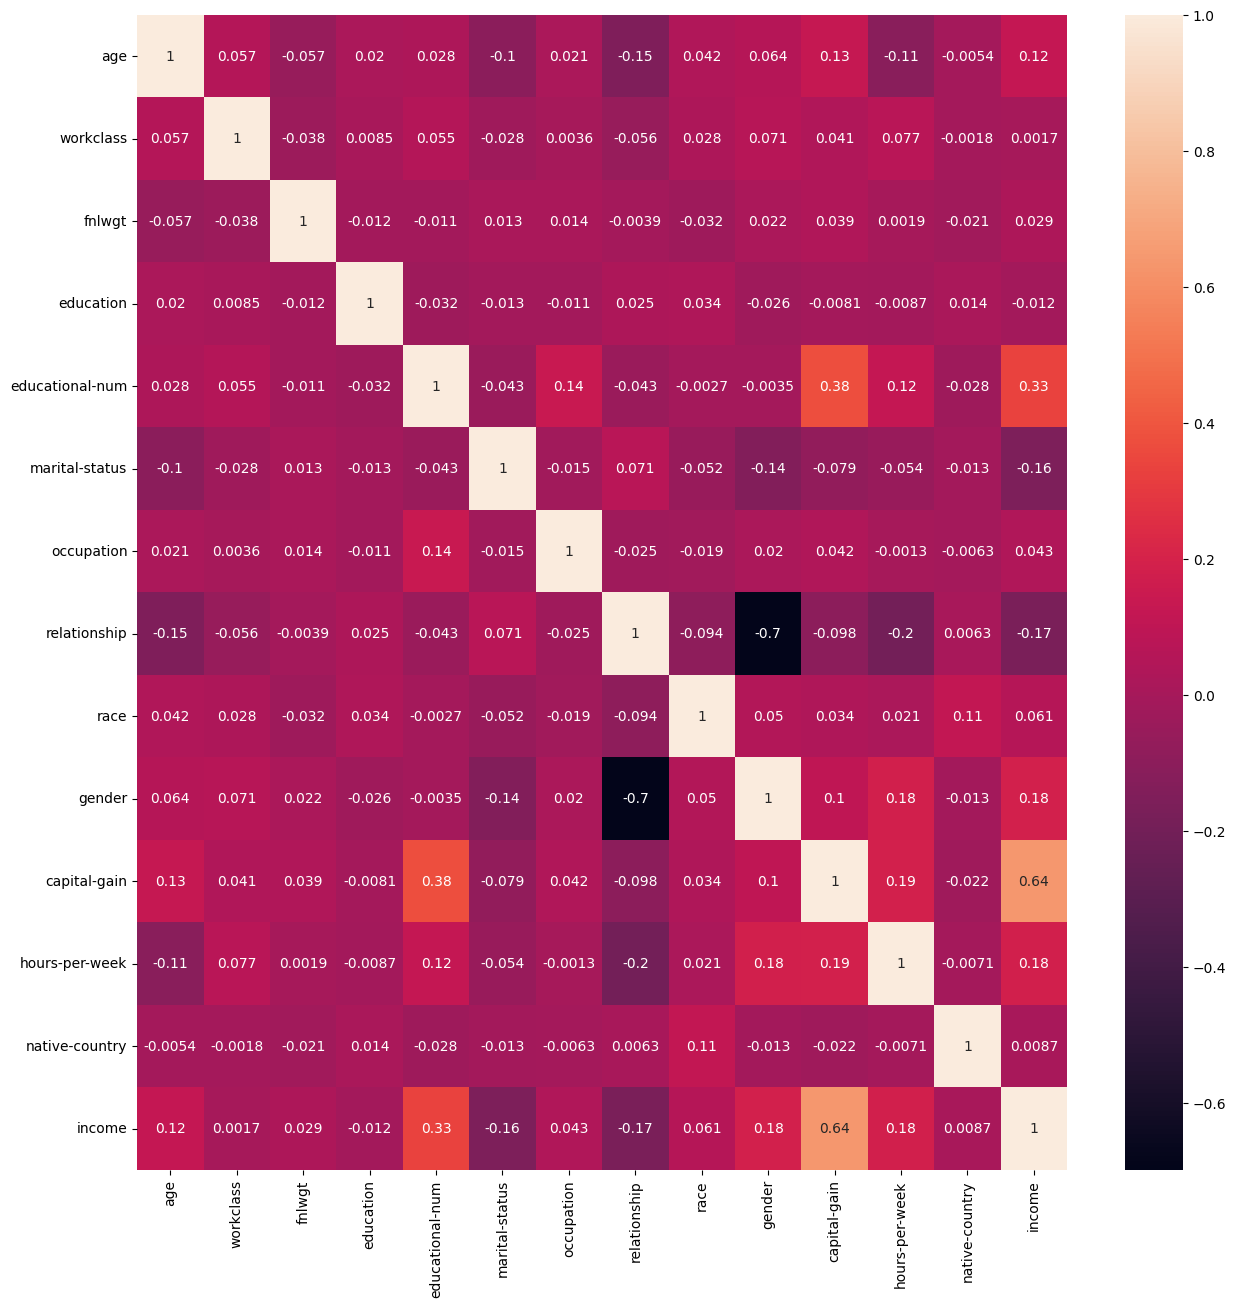

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_mx.corr(),annot=True)

#### Nhận xét :
Từ ma trận tương quan ta có thể thấy các biến
age, education-num, marital-status, relationship, capital_gain,gender, hours-per-week có ảnh hưởng tới income

## 2.2 Phân tích các biến với nhãn

#### Các biến có thể ảnh hưởng tới income sau khi phân tích:
1. Age(0.12)
2. Education-num(0.33)
3. Marital-status(-0.16)
4. Relationship(-0.17)
5. capital_gain(0.64)
6. Gender(0.18)
7. Hours-per-week(0.18)


### 2.2.1  Age & income (0.12)

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

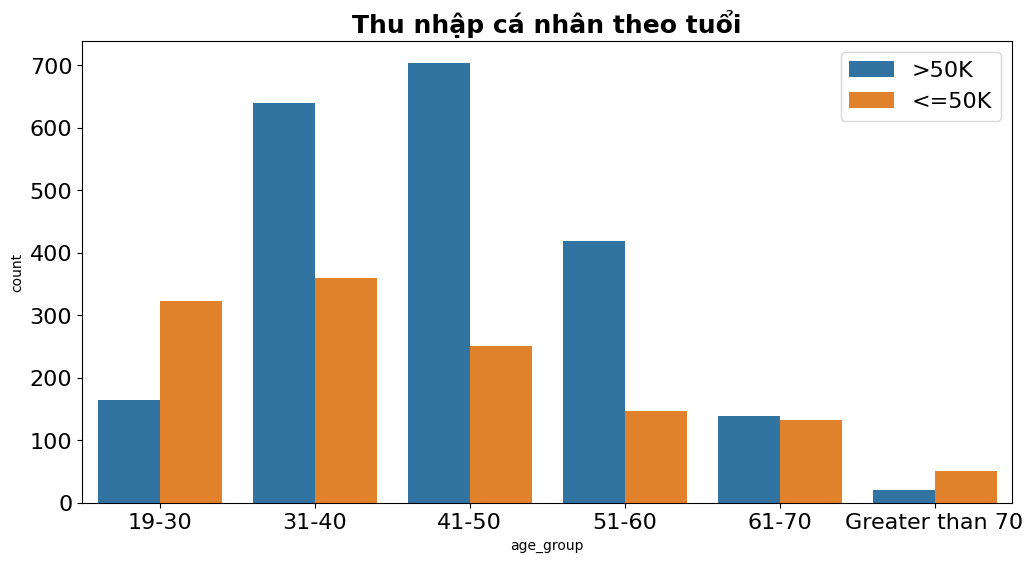

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=df, x='age_group', hue='income', order=order_list)
plt.title('Thu nhập cá nhân theo tuổi', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

#### Nhận xét :
- Nhóm tuổi 41-50 có số lượng người có thu nhập trên 50K cao nhất, theo sau là nhóm tuổi 31-40.
- Nhóm tuổi 19-30 và nhóm tuổi trên 70 có số lượng người có thu nhập trên 50K thấp nhất.
- Đối với nhóm có thu nhập dưới hoặc bằng 50K, nhóm tuổi 31-40 và 41-50 chiếm ưu thế lớn về số lượng.
Số lượng cá nhân với thu nhập dưới hoặc bằng 50K giảm dần từ nhóm tuổi 51-60 trở đi, và rất ít người trong nhóm tuổi trên 70 có thu nhập trong khoảng này.

### 2.2.2 Education-num & income (0.33)

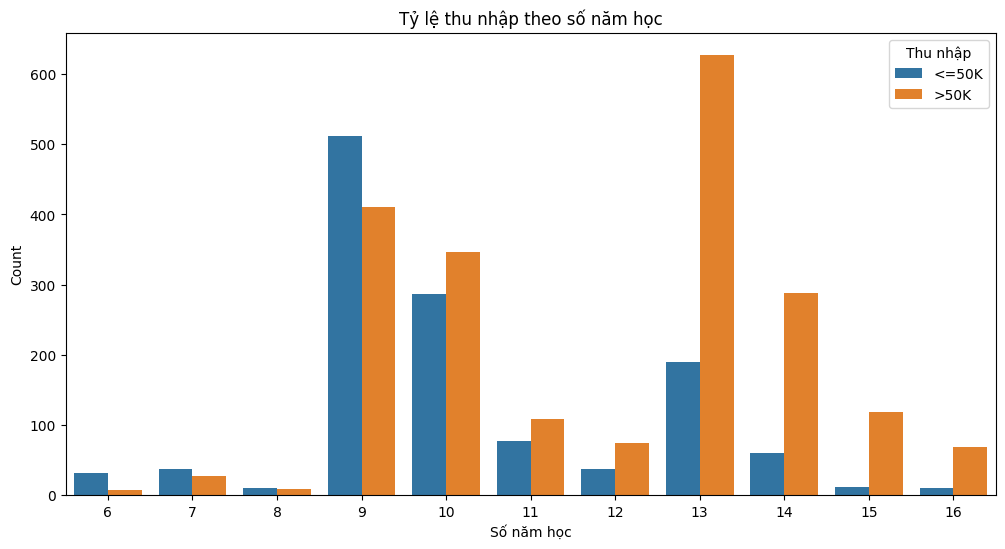

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='educational-num', hue='income', data=df)

# Đặt các nhãn và tiêu đề
plt.title('Tỷ lệ thu nhập theo số năm học')
plt.xlabel('Số năm học')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.legend(title='Thu nhập', loc='upper right')
plt.show()

#### Nhận xét:
- Số Năm Học Thấp (6-9): Có tỷ lệ cao người có thu nhập dưới hoặc bằng 50K so với những người có thu nhập trên 50K.
- Số Năm Học Trung Bình (10-12): Người có số năm học trong khoảng này cũng có tỷ lệ cao hơn về số người có thu nhập <=50K so với những người có thu nhập >50K, nhưng tỷ lệ này bắt đầu thay đổi ở mức 13 năm học.
- Số Năm Học Cao (13-16): Khi số năm học tăng lên từ 13 trở đi, tỷ lệ người có thu nhập >50K tăng lên đáng kể so với những người có thu nhập <=50K. Đặc biệt ở mức độ học 16 năm, có thể đại diện cho việc hoàn thành bậc học sau đại học, tỷ lệ người có thu nhập >50K cao hơn rất nhiều so với nhóm có thu nhập thấp hơn.

### 2.2.3 Marital-status & income (-0.16)

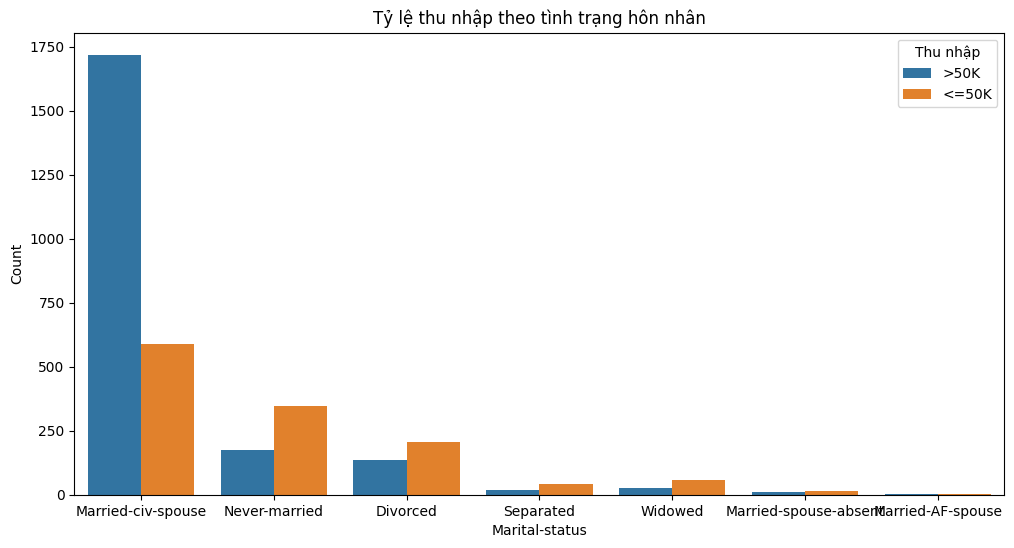

In [ ]:
# Tạo biểu đồ countplot cho tỷ lệ thu nhập theo mối quan hệ
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', hue='income', data=df)

# Đặt các nhãn và tiêu đề
plt.title('Tỷ lệ thu nhập theo tình trạng hôn nhân')
plt.xlabel('Marital-status')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.legend(title='Thu nhập', loc='upper right')
plt.show()

#### Nhận xét:
- Married-civ-spouse: Đây là nhóm có tỷ lệ người có thu nhập >50K cao nhất so với các nhóm khác, đồng thời cũng có số lượng đáng kể người có thu nhập <=50K. Điều này cho thấy rằng những người kết hôn dân sự có khả năng có thu nhập cao hơn.
- Never-married: Nhóm này chủ yếu có thu nhập <=50K, với số lượng người có thu nhập >50K khá thấp, phản ánh rằng người chưa kết hôn có thể có thu nhập thấp hơn.
- Divorced: Số lượng người ly hôn có thu nhập <=50K cũng cao hơn so với những người có thu nhập >50K.
- Separated: Tương tự như người ly hôn, những người này chủ yếu có thu nhập thấp hơn.
- Widowed: Phần lớn người góa bụa có thu nhập <=50K, số lượng ít người có thu nhập >50K.
- Married-spouse-absent và Married-AF-spouse: Cả hai nhóm này đều có số lượng nhỏ hơn so với các nhóm khác, nhưng tỷ lệ người có thu nhập <=50K và >50K khá cân bằng.

### 2.2.4  Relationship & income (-0.17)

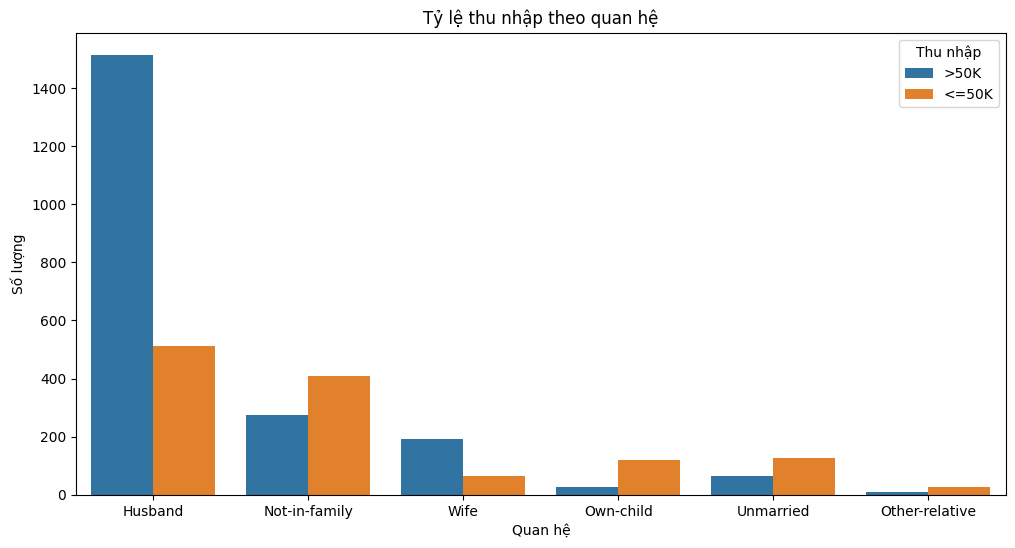

In [ ]:
# Tạo biểu đồ countplot cho tỷ lệ thu nhập theo mối quan hệ
plt.figure(figsize=(12, 6))
sns.countplot(x='relationship', hue='income', data=df)

# Đặt các nhãn và tiêu đề
plt.title('Tỷ lệ thu nhập theo quan hệ')
plt.xlabel('Quan hệ')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.legend(title='Thu nhập', loc='upper right')
plt.show()

#### Nhận xét:
- Husband: Đây là nhóm có số lượng lớn nhất người với thu nhập >50K so với các nhóm khác, điều này cho thấy rằng trong vai trò truyền thống của "người chồng", có khả năng cao họ là những người kiếm chính trong gia đình.
- Wife: Số lượng phụ nữ được ghi nhận là "Wife" có thu nhập >50K thấp hơn so với "Husband", nhưng vẫn cao hơn các nhóm khác như "Own-child" và "Other-relative", điều này có thể phản ánh mức độ tham gia vào lực lượng lao động và thu nhập của phụ nữ đã kết hôn.
- Not-in-family: Nhóm này có số lượng người có thu nhập >50K và <=50K khá cân bằng, có thể bao gồm những người sống một mình hoặc không phải là phần của gia đình hạt nhân truyền thống và có thể có thu nhập độc lập.
- Own-child và Other-relative: Những nhóm này chủ yếu có thu nhập <=50K, có thể phản ánh rằng những người trong nhóm này thường là người phụ thuộc hoặc mới bắt đầu sự nghiệp của mình.
- Unmarried: Số lượng người có thu nhập >50K thấp hơn so với <=50K, nhưng không quá chênh lệch, điều này cho thấy rằng người độc thân có thể có thu nhập ổn định nhưng không cao.

### 2.2.5 Capital-gain & income (0.64)

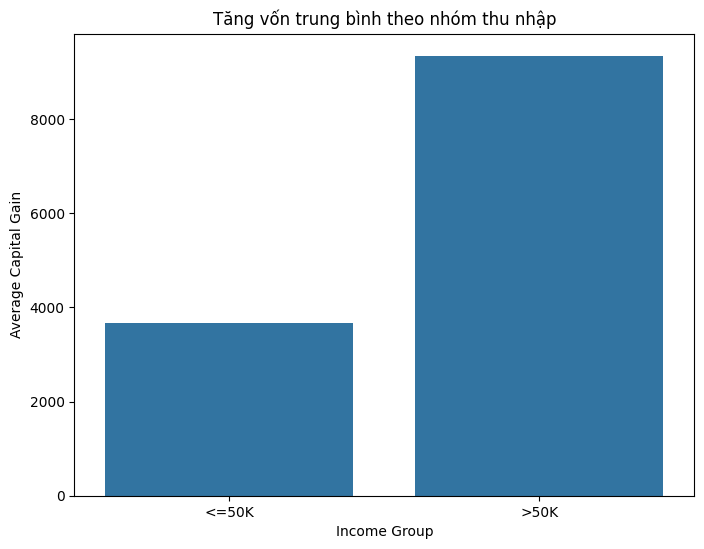

In [ ]:
mean_capital_gain_by_income = df.groupby('income')['capital-gain'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='capital-gain', data=mean_capital_gain_by_income)
plt.title('Tăng vốn trung bình theo nhóm thu nhập')
plt.xlabel('Income Group')
plt.ylabel('Average Capital Gain')

plt.show()


#### Nhận xét:
- Nhóm có thu nhập trên 50K có lợi nhuận vốn trung bình cao hơn rõ rệt so với nhóm có thu nhập dưới hoặc bằng 50K. Điều này có thể chỉ ra rằng những người có thu nhập cao cũng có nhiều cơ hội hơn để đầu tư và thu lợi nhuận từ vốn đầu tư của họ.
- Sự chênh lệch đáng kể trong lợi nhuận vốn giữa hai nhóm thu nhập có thể phản ánh khả năng tiếp cận tài chính, kiến thức đầu tư, và các cơ hội đầu tư khác nhau.
- Biểu đồ cũng cho thấy mối quan hệ giữa lợi nhuận vốn và thu nhập, nơi lợi nhuận vốn có thể được xem như một yếu tố đóng góp cho việc có một mức thu nhập cao.

### 2.2.6  Gender & income (0.18)

In [ ]:
# Tính tỷ lệ nam/nữ có thu nhập >50K và <=50K
gender_income_ratio = df.groupby('gender')['income'].value_counts(normalize=True).unstack().fillna(0)

# In ra kết quả
print("Tỷ lệ nam/nữ có thu nhập >50K và <=50K:")
print(gender_income_ratio)

Tỷ lệ nam/nữ có thu nhập >50K và <=50K:
income     <=50K      >50K
gender                    
Female  0.541393  0.458607
Male    0.328433  0.671567


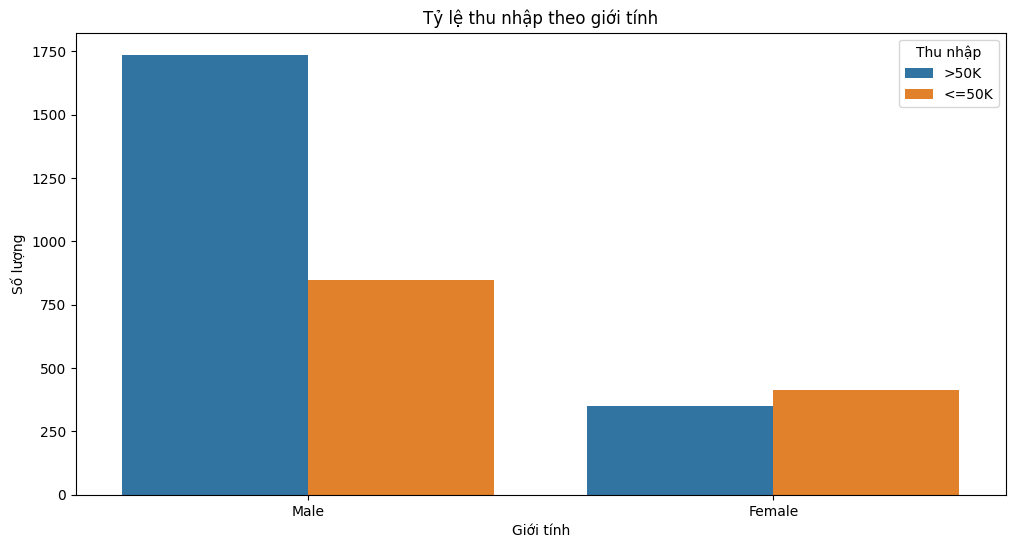

In [ ]:
# Tạo biểu đồ countplot cho tỷ lệ thu nhập theo giới tính
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='income', data=df)

# Đặt các nhãn và tiêu đề
plt.title('Tỷ lệ thu nhập theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.legend(title='Thu nhập', loc='upper right')
plt.show()

#### Nhận xét:
- Do số lượng nam giới cao rõ rệt nên có thể quan sát thấy sự chênh lệch giới tính rõ rệt trong cả hai mức thu nhập, với nam giới chiếm ưu thế hơn nữ giới trong cả hai mức.

### 2.2.7 Hours-per-week & income (0.18)

In [ ]:
# Định nghĩa hàm per_week_group
def per_week_group(x):
    if x <= 30:
        return "0-30"
    elif x <= 50:
        return "31-50"
    elif x <= 70:
        return "51-70"
    elif x <= 90:
        return "71-90"
    else:
        return "Trên 90"

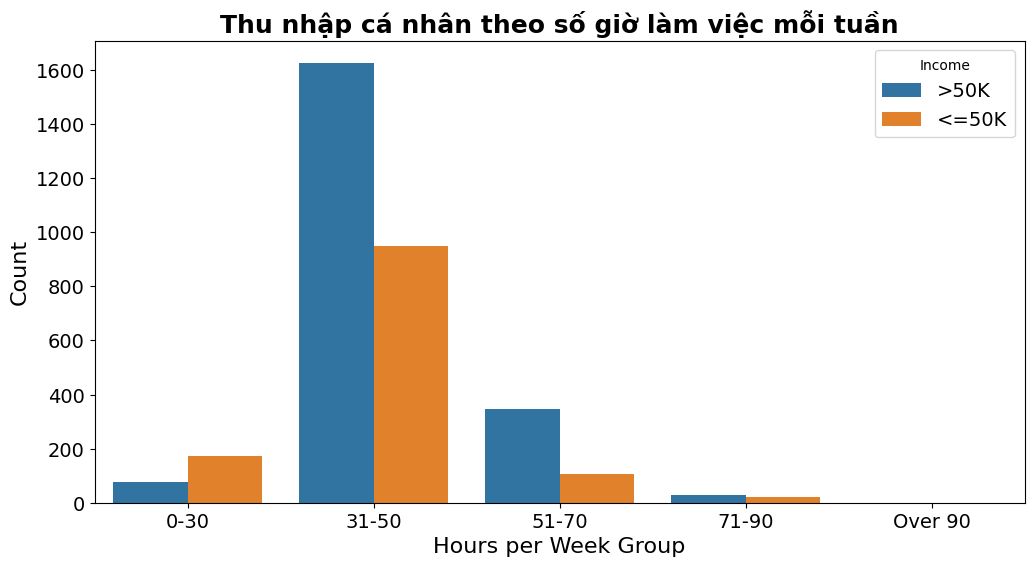

In [ ]:
# Áp dụng hàm per_week_group cho cột 'hours-per-week' và thêm cột 'per_week_group' vào DataFrame
df['per_week_group'] = df['hours-per-week'].apply(per_week_group)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
order_list = ['0-30', '31-50', '51-70', '71-90', 'Over 90']
sns.countplot(data=df, x='per_week_group', hue='income', order=order_list)
plt.title('Thu nhập cá nhân theo số giờ làm việc mỗi tuần', fontsize=18, fontweight='bold')
plt.xlabel('Hours per Week Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14)
plt.show()

#### Nhận xét:
- 0-30 giờ/tuần: Nhóm này chủ yếu gồm những người có thu nhập <=50K, chỉ một số nhỏ có thu nhập >50K. Điều này có thể phản ánh việc làm bán thời gian hoặc các công việc không đòi hỏi nhiều giờ làm việc mỗi tuần.
- 31-50 giờ/tuần: Đây là nhóm lớn nhất, với số lượng người có thu nhập <=50K cao hơn nhiều so với số lượng có thu nhập >50K. Điều này phản ánh một tuần làm việc tiêu chuẩn, nơi đa số người làm việc toàn thời gian có thu nhập thấp hơn.
- 51-70 giờ/tuần: Số lượng người làm việc nhiều giờ hơn mỗi tuần nhưng có thu nhập <=50K vẫn còn đáng kể, tuy nhiên, tỷ lệ người có thu nhập >50K trong nhóm này cao hơn so với nhóm 31-50 giờ/tuần.
- 71-90 giờ/tuần: Nhóm này nhỏ hơn và chủ yếu gồm những người có thu nhập <=50K. Điều này có thể bất ngờ vì người ta thường kỳ vọng càng làm nhiều giờ sẽ có thu nhập cao hơn, nhưng điều này cũng có thể phản ánh việc làm theo giờ hoặc việc làm có mức lương cố định không tăng khi số giờ làm việc tăng.
- Trên 90 giờ/tuần: Đây có thể là những trường hợp đặc biệt hoặc ngoại lệ, với số lượng người không nhiều, và hầu hết có thu nhập <=50K.

## 2.3 Bivariate

In [ ]:
selected_columns = ['age', 'educational-num', 'marital-status', 'relationship',
                    'capital-gain', 'gender', 'hours-per-week']
df_selected = df[selected_columns]

In [ ]:
cat_cols2 = ['marital-status','relationship','gender']
Label_Encoder(df_selected,cat_cols2)

<ipython-input-19-71448f702de9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-19-71448f702de9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
<ipython-input-19-71448f702de9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

<Axes: >

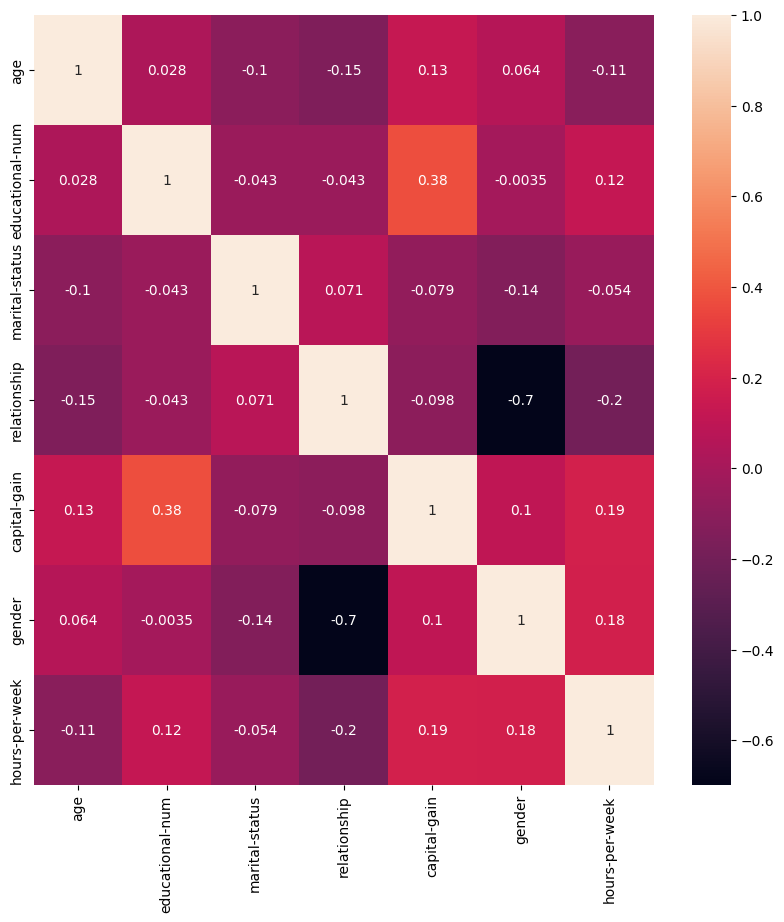

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_selected.corr(),annot=True)

### 2.3.1 Education-num & capital-gain (0.38)

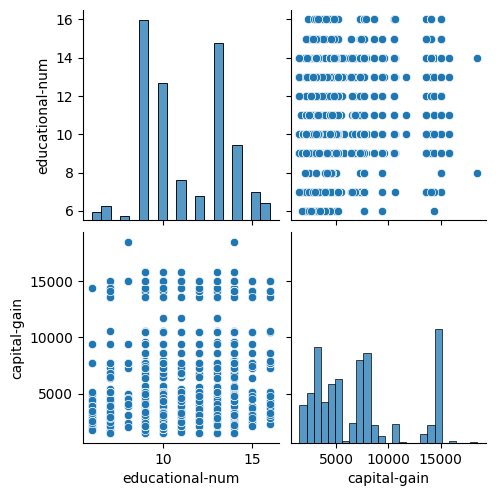

In [ ]:
# Vẽ biểu đồ pair-plot
sns.pairplot(df, vars=['educational-num', 'capital-gain'])
plt.show()

#### Nhận xét:
- Biểu đồ Histogram (Trên cùng bên trái): Biểu đồ cho thấy phân phối của educational-num, với hai đỉnh nổi bật có thể tương ứng với những người hoàn thành giáo dục phổ thông (khoảng 9-12 năm học) và những người có bằng cử nhân hoặc cao hơn (khoảng 16 năm học).

- Biểu đồ Scatter (Trên cùng bên phải và dưới cùng ở giữa): Biểu đồ scatter giữa educational-num và capital-gain không thể hiện một mối quan hệ tuyến tính rõ ràng, nhưng cho thấy một số điểm tập trung nhiều giá trị capital-gain cao ở những người có số năm học cao.

- Biểu đồ Histogram (Dưới cùng bên phải): Phân phối của capital-gain chủ yếu tập trung ở giá trị thấp, với một số ít các giá trị cao nổi bật, điều này phản ánh việc hầu hết mọi người không hoặc chỉ có một lượng nhỏ capital-gain.

### 2.3.2 Relationship & gender (-0.7)

gender,Female,Male
relationship,,
Husband,0,2026
Not-in-family,300,385
Other-relative,17,20
Own-child,65,84
Unmarried,122,70
Wife,257,0


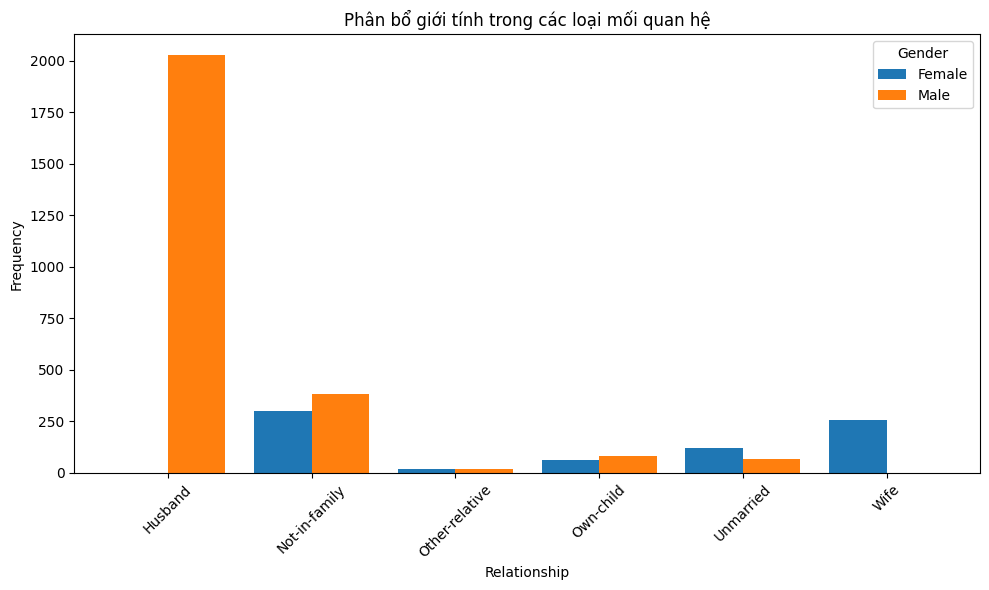

In [ ]:

relationship_gender_crosstab = pd.crosstab(index=df['relationship'], columns=df['gender'])


relationship_gender_crosstab.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Phân bổ giới tính trong các loại mối quan hệ')
plt.xlabel('Relationship')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

relationship_gender_crosstab

#### Nhận xét:
- Biểu đồ cho thấy sự chênh lệch đáng kể giữa các mối quan hệ và giới tính. Ví dụ, trong số những người đang đóng vai trò là con riêng của mình (Own-child), có số lượng nam giới cao hơn so với phụ nữ, trong khi ngược lại, có số lượng phụ nữ đang sống độc thân (Unmarried) cao hơn so với nam giới.

### 2.3.3 Marital-status & gender (-0.14)

gender,Female,Male
marital-status,,
Divorced,168,175
Married-AF-spouse,1,1
Married-civ-spouse,270,2038
Married-spouse-absent,11,14
Never-married,224,296
Separated,27,36
Widowed,60,25


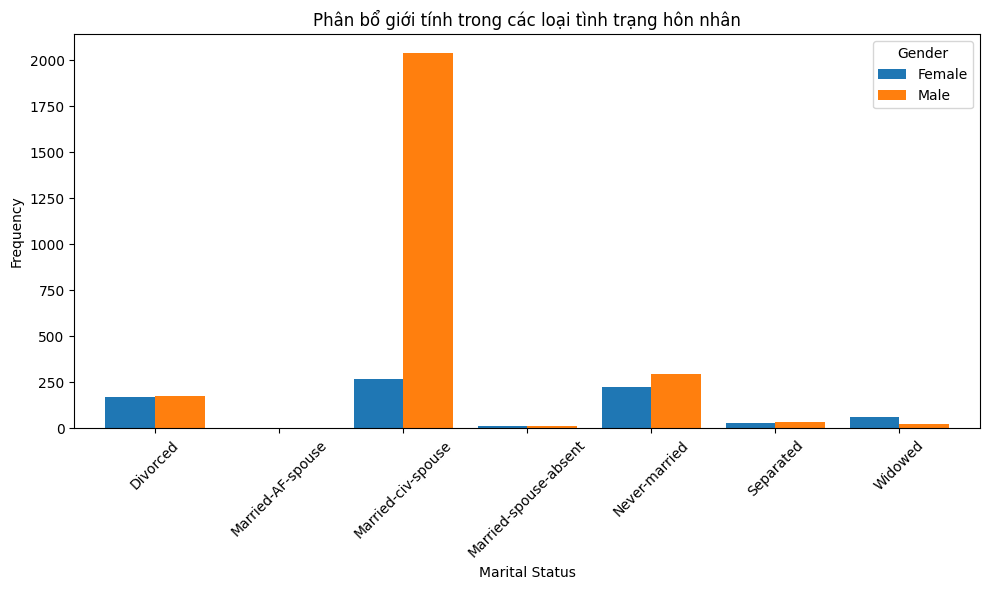

In [ ]:

marital_status_gender_crosstab = pd.crosstab(index=df['marital-status'], columns=df['gender'])


marital_status_gender_crosstab.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Phân bổ giới tính trong các loại tình trạng hôn nhân')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()


marital_status_gender_crosstab


#### Nhận xét:
- Nhìn chung, tỷ lệ nam giới cao hơn trong nhóm "Chưa kết hôn" (Never-married) và "Ly hôn" (Divorced).
- Tỷ lệ nữ giới cao hơn trong nhóm "Góa phụ/góa chồng" (Widowed).
- Tỷ lệ nam và nữ có sự chênh lệch rất lớn khi tỷ lệ nam giới cao hơn rất nhiều trong trong nhóm "Vợ/chồng" (Married-civ-spouse)
- Tỷ lệ nam và nữ tương đối cân bằng trong nhóm Ly thân" (Separated).

### 2.3.4 Relationship & house-per-week (-0.2)

relationship
Wife              37.085603
Own-child         38.953020
Other-relative    41.216216
Unmarried         42.442708
Not-in-family     43.547445
Husband           45.333662
Name: hours-per-week, dtype: float64

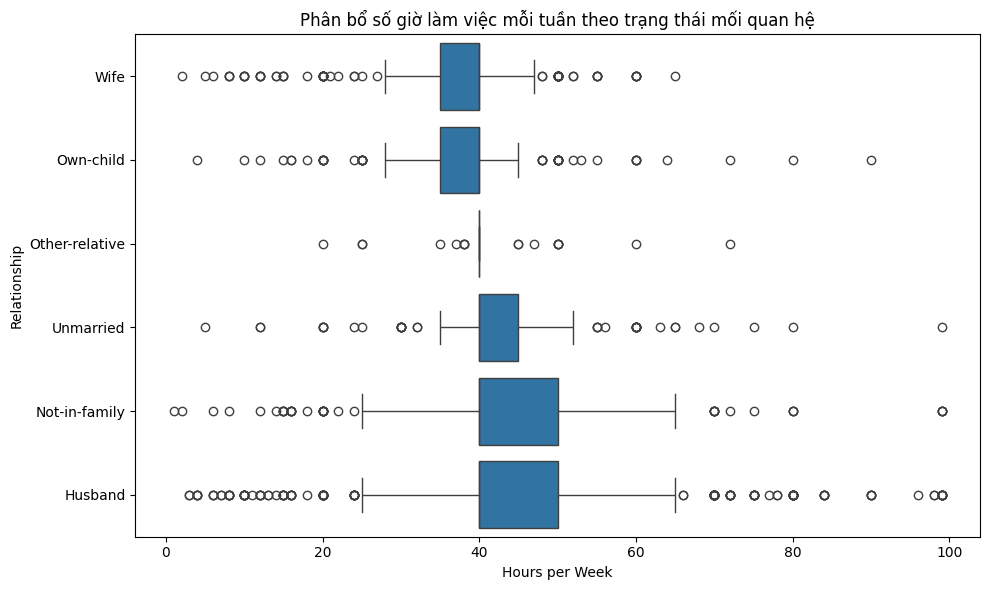

In [ ]:

mean_hours_per_relationship = df.groupby('relationship')['hours-per-week'].mean().sort_values()


plt.figure(figsize=(10, 6))
sns.boxplot(x='hours-per-week', y='relationship', data=df, order=mean_hours_per_relationship.index)
plt.title('Phân bổ số giờ làm việc mỗi tuần theo trạng thái mối quan hệ')
plt.xlabel('Hours per Week')
plt.ylabel('Relationship')
plt.tight_layout()

# Display the mean hours
mean_hours_per_relationship


#### Nhận xét:
- Nhóm "Không kết hôn" có số giờ làm việc trung bình cao nhất (khoảng 45 giờ/tuần).
- Nhóm "Vợ" và "Chồng" có số giờ làm việc trung bình thấp hơn (khoảng 35-40 giờ/tuần).
- Nhóm "Con riêng" và "Họ hàng khác" có số giờ làm việc trung bình thấp nhất (khoảng 30-35 giờ/tuần).
- Nhóm "Cha mẹ" có số giờ làm việc trung bình cao, nhưng độ phân tán lớn (từ 20 đến 60 giờ/tuần).
- Nhóm "Không thuộc gia đình" có số lượng dữ liệu ít, nên khó đưa ra kết luận chính xác.

### 2.3.5 Relatioship & age (-0.15)

relationship
Own-child         30.268456
Other-relative    39.513514
Wife              40.910506
Not-in-family     41.626277
Unmarried         44.276042
Husband           45.113524
Name: age, dtype: float64

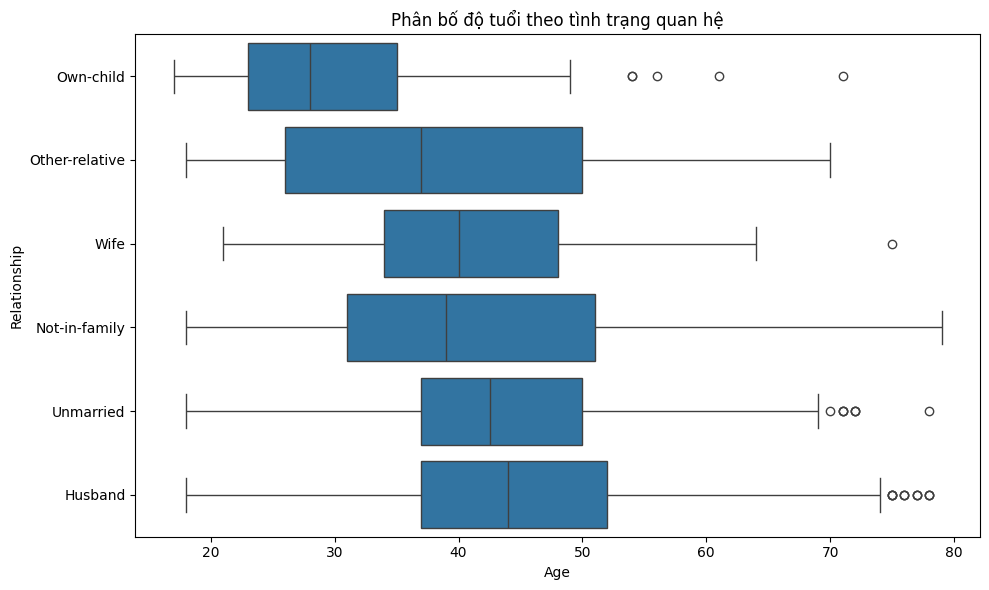

In [ ]:
mean_age_per_relationship = df.groupby('relationship')['age'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='relationship', data=df, order=mean_age_per_relationship.index)
plt.title('Phân bố độ tuổi theo tình trạng quan hệ')
plt.xlabel('Age')
plt.ylabel('Relationship')
plt.tight_layout()

mean_age_per_relationship


#### Nhận xét:
- Nhóm "Không kết hôn" có độ tuổi trung bình cao nhất.
- Nhóm "Con riêng" có độ tuổi trung bình thấp nhất .
- Nhóm "Chồng" có độ tuổi trung bình cao thứ hai.
- Cuối cùng là nhóm "Không thuộc gia đình" có độ tuổi trung bình cao nhất.

### 2.3.6 Gender & education-num

gender,Female,Male
educational-num,,
6,6,32
7,14,50
8,3,16
9,198,724
10,155,477
11,54,132
12,30,81
13,158,659
14,108,240


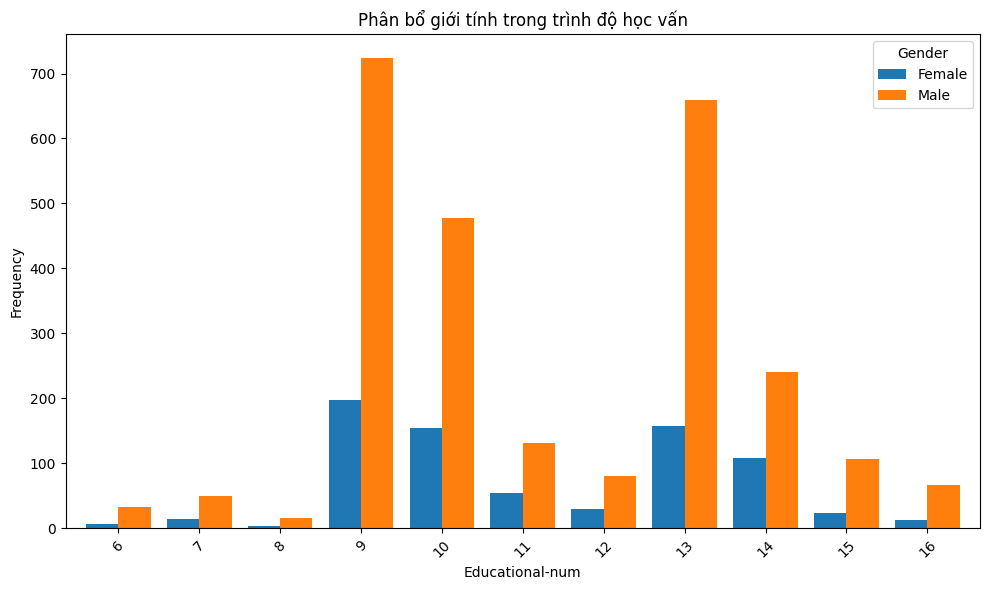

In [ ]:

educationum_gender_crosstab = pd.crosstab(index=df['educational-num'], columns=df['gender'])


educationum_gender_crosstab.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Phân bổ giới tính trong trình độ học vấn')
plt.xlabel('Educational-num')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

educationum_gender_crosstab

## Bước 3 : Áp dụng mô hình

## 3.1 Trước khi chọn lọc

In [ ]:
df_model = df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
].copy()

In [ ]:
cat_cols3 = df[['workclass',
'education',
'marital-status',
'occupation',
'relationship',
'race',
'gender',
'native-country',
'income']]
Label_Encoder(df_model,cat_cols3)


### Linear Regression

In [ ]:
y = df_model['income']
df_model= df_model.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1303080949508863


### Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)
LR_pred = logreg.predict(X_test)
print(metrics.classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       256
           1       0.85      0.88      0.87       414

    accuracy                           0.83       670
   macro avg       0.82      0.82      0.82       670
weighted avg       0.83      0.83      0.83       670



In [ ]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, LR_pred))

Accuracy:(Độ chính xác) 0.8313432835820895


## 3.2 Sau khi chọn lọc

In [ ]:
df_model = df[['educational-num','capital-gain','gender','marital-status','hours-per-week','income']].copy()

In [ ]:
cat_cols3 = df[['marital-status','gender','income']]
Label_Encoder(df_model,cat_cols3)


### Linear Regression

In [ ]:
y = df_model['income']
df_model = df_model.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.13121040292413153


In [ ]:
logreg_ed = LogisticRegression(max_iter=500)
logreg_ed.fit(X_train,y_train)
LR_pred = logreg_ed.predict(X_test)
print(metrics.classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       256
           1       0.88      0.87      0.88       414

    accuracy                           0.85       670
   macro avg       0.84      0.84      0.84       670
weighted avg       0.85      0.85      0.85       670



In [ ]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, LR_pred))

Accuracy:(Độ chính xác) 0.8492537313432836


# 4.Trả lời câu hỏi

## 1. Hầu hết dân số thuộc quốc gia nào?
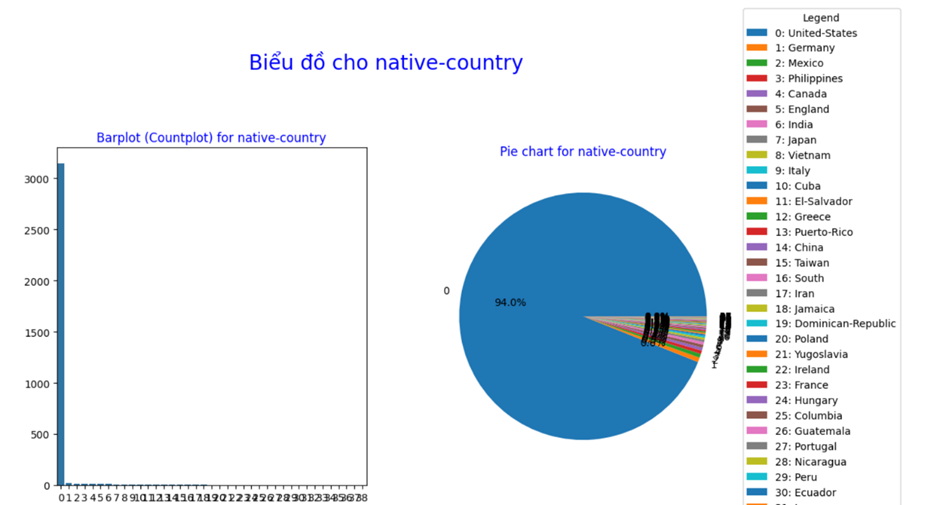

**Nhận xét:** Đa số dân số trong dữ liệu này đến từ "United-States," chiếm 94%, có thể khảo sát được lấy từ mỹ vì các quan sát chiềm phần lớn là người mỹ.

## 2. Người lao động chủ yếu thuộc vào độ tuổi nào?
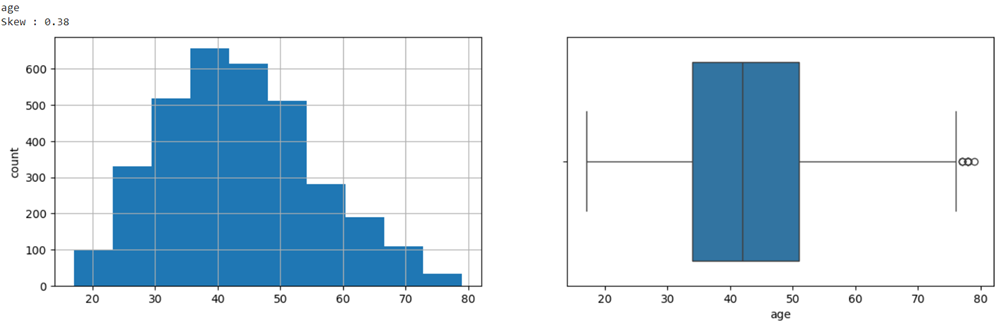
**Nhận xét:** Dựa vào 2 hình ta có thể thấy biểu đồ histogram phần lớn rơi vào nhóm từ 20 đến 50 và bắt đầu giảm dần, đỉnh điểm là 40 tuổi.Với biểu đồ boxplot cho thấy độ tuổi trung bình từ 35 đến 50 với trung vị là 42-43.

## 3. Có sự khác biệt gì về thu nhập khi chưa kết hôn và kết hôn không?
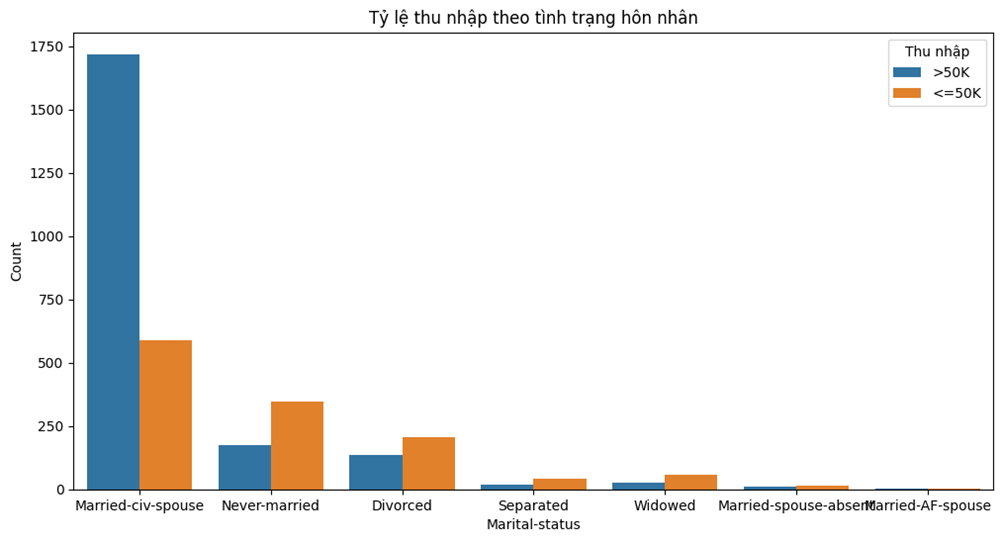
**Nhận xét:** 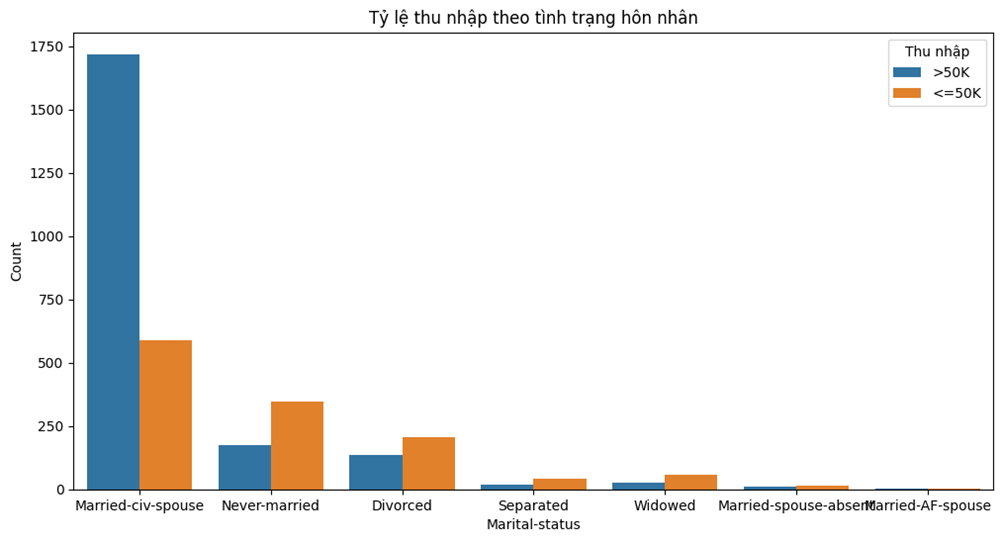
**Nhận xét:** Dựa vào biểu đồ ta có thể thấy những người đã kết hôn ("Married-civ-spouse") có số lượng >50k cao hơn, những người chưa kết hôn ("Never-married") xuất hiện nhiều hơn trong nhóm có thu nhập <50k. Cho thấy rằng việc kết hôn có thể liên quan đến mức thu nhập cao hơn, có thể do có thêm sự hỗ trợ từ bạn đời, lợi ích từ việc kết hợp thu nhập.

## 4. "Người có trình độ học vấn cao hơn thường có thu nhập cao hơn không? Liệu mối quan hệ này có sự khác biệt giữa nam và nữ không?"
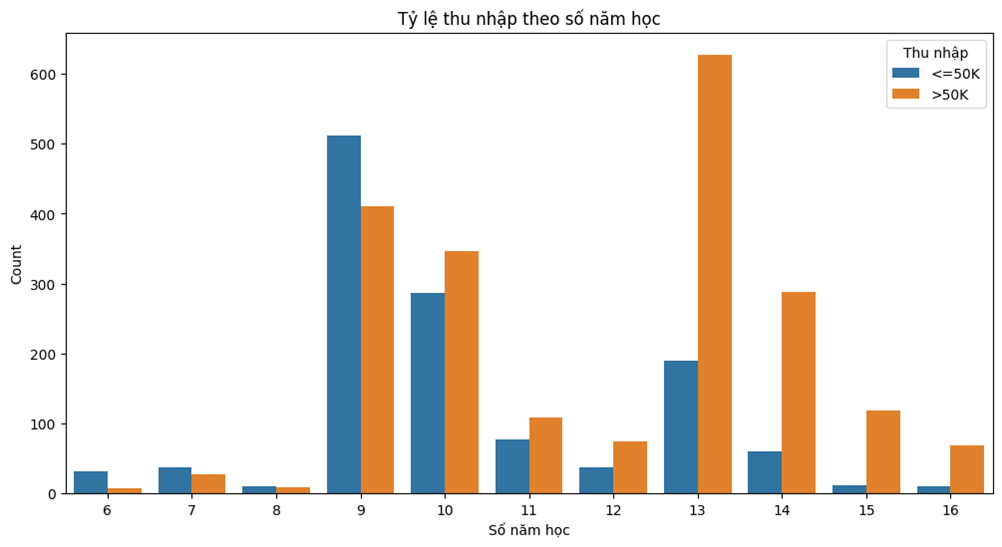
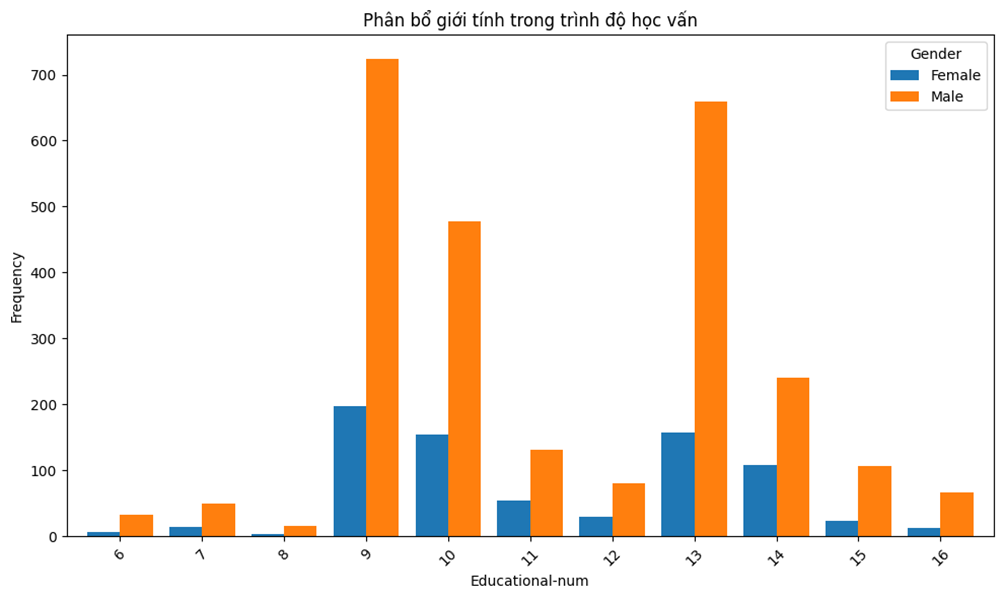
**Nhận xét:** Từ biểu đồ ta có thể thấy thấy người có số năm học cao hơn thường có số lượng cá nhân kiếm được thu nhập >50k cao hơn so với những người có ít năm học hơn. Đặc biệt, có vẻ như có một sự gia tăng đáng kể về số lượng người có thu nhập cao khi số năm học vượt qua ngưỡng 12 năm học(hoàn thành phổ thông).
Dựa vào dataset ta có thể thấy sự chênh lệch giữa nam và nữ dựa vào dataset này thì nam giới chiếm phần lớn ở hầu hết các năm học, đặc biệt phần lớn ở mức trung bình.Từ các phân tích trên ta có thể suy ra phụ nữ có trình độ học vấn cao không được hưởng lợi về mặt thu nhập tương tự như nam giới với trình độ học vấn tương đương, do sự chênh lệch giới tính trong thu nhập có thể vẫn tồn tại ngay cả khi trình độ học vấn tăng lên.


## 5. Có sự khác biệt về mức thu nhập giữa những người làm việc full-time và part-time không?
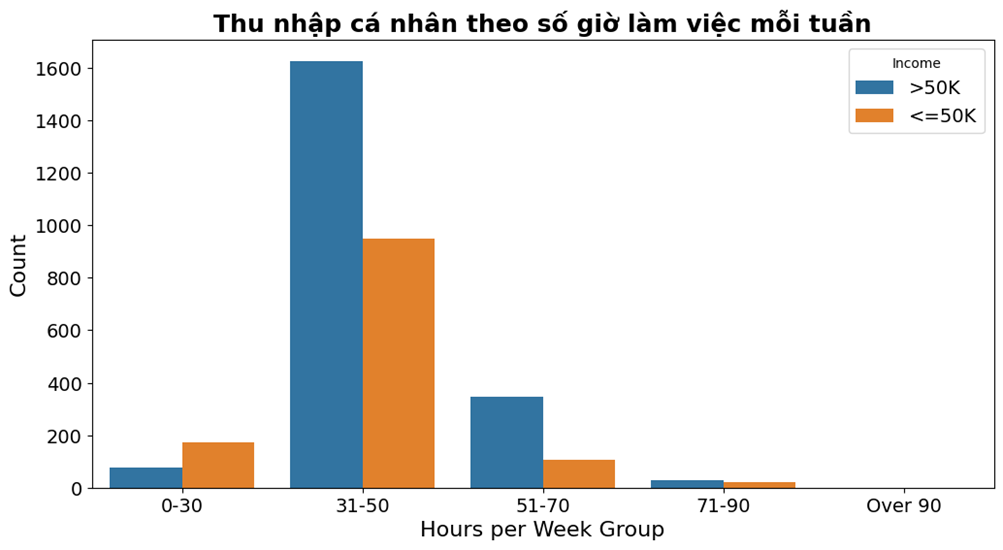
**Nhận xét:**Từ biểu đồ ta có thể thấy, người làm việc full-time(31-50)có xu hướng kiếm được thu nhập cao hơn so với những người làm việc part-time(0-30). Có một số ít người làm việc hơn 50 giờ mỗi tuần kiếm được >50k, nhưng số lượng này ít hơn so với nhóm làm việc từ 31-50 giờ.Vậy có thể thấy càng làm nhiều giờ thì cơ hội kiếm được thu nhập cao hơn càng tăng.

## 6. Hầu hết dân số đều đã lập gia đình?
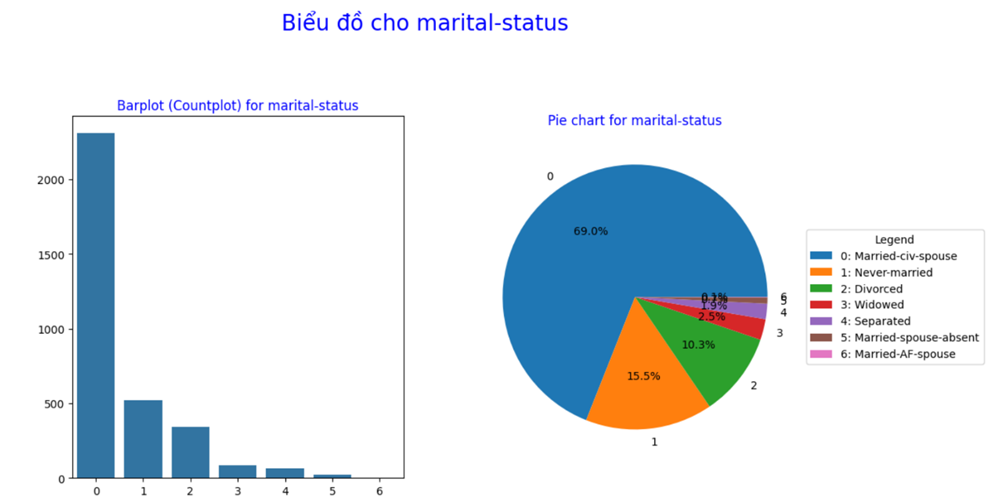
**Nhận xét:**Dựa vào biểu đồ ta có thể thấy Married-civ-spouse chiếm 69% điều này có nghĩa là hầu hết dân số đã kết hôn.Các mục khác có giá trị nhỏ hơn theo sau là Never-married chiếm phần nhỏ hơn nhưng cũng cho thấy dân số có tỉ lệ độc thân cao.

## 7.Nam và nữ ai có thu nhập >50K cao hơn?
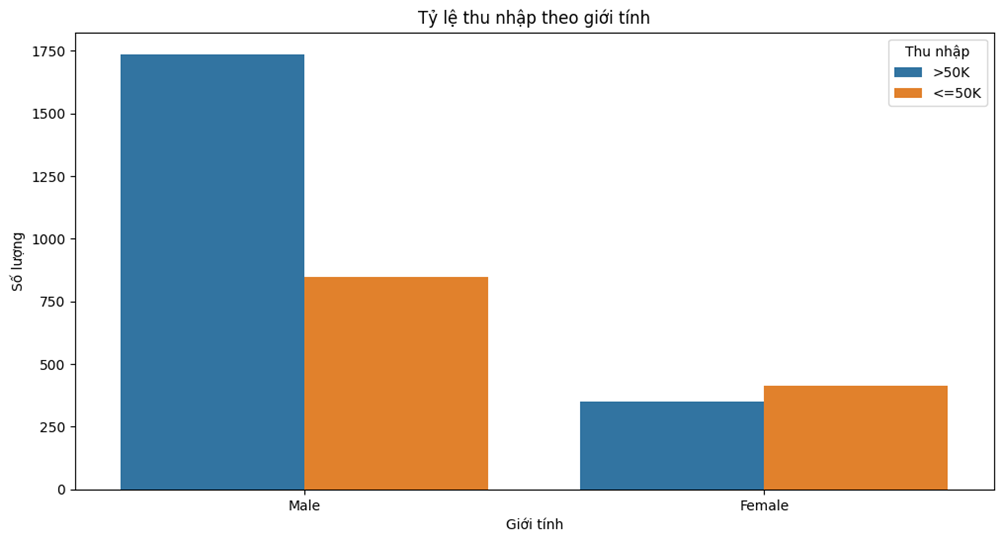
**Nhận xét:**Dựa vào biểu đồ trên  có thể thấy số lượng nam giới có thu nhập >50k cao hơn so với số lượng nữ giới. Biểu đồ cho thấy sự chênh lệch rõ rệt giữa hai nhóm, với nam giới chiếm một tỷ lệ lớn hơn trong nhóm thu nhập cao.


## 8.Phân phối của các trình độ học vấn trong tập dữ liệu như thế nào?
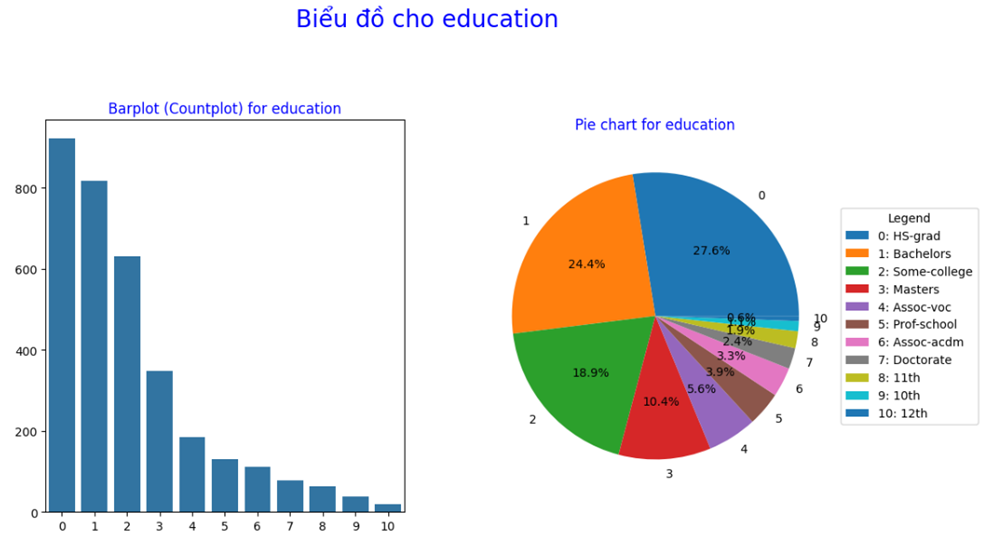
**Nhận xét:**Biểu đồ hình tròn cho thấy sự phân bố mức học vấn của một nhóm người. Nhóm có tỷ lệ cao nhất là tốt nghiệp trung học phổ thông (HS-grad) (27.6%), tiếp theo là cử nhân (Bachelors) (24.4%) và cao đẳng (some-college) (18.9%). Nhóm có tỷ lệ thấp nhất là 12th (0.6%). Biểu đồ cũng cho thấy sự chênh lệch lớn giữa các nhóm học vấn thấp và sự phân bố tương đối đồng đều giữa các nhóm học vấn cao.

## 9.Phân phối giới tính trong tập dữ liệu là như thế nào?
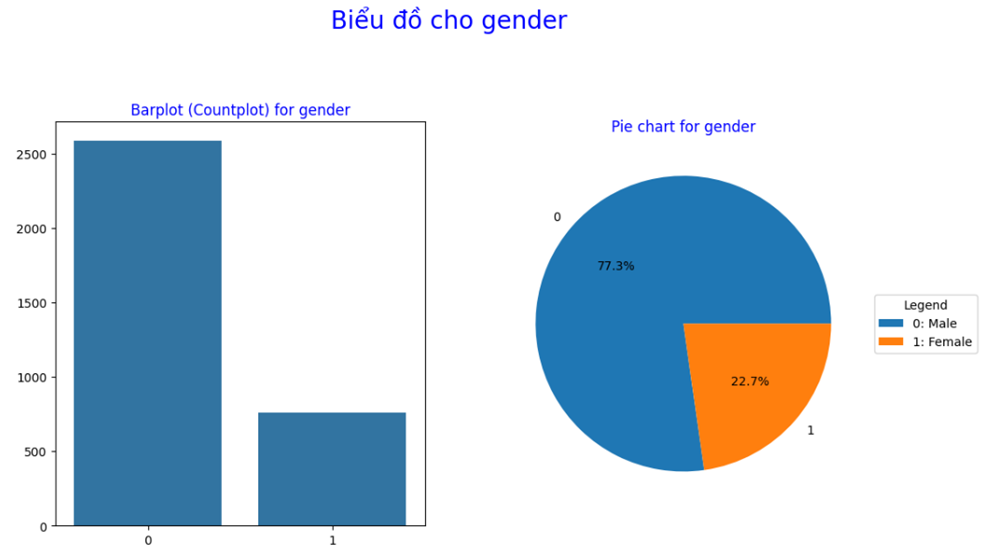
**Nhận xét:**Biểu đồ cho thấy sự phân bố giới tính trong một nhóm người, với tỷ lệ nam giới cao hơn nhiều so với nữ giới (77.3% so với 22.7%).

## 10.Mối quan hệ có ảnh hưởng đến thu nhập không?
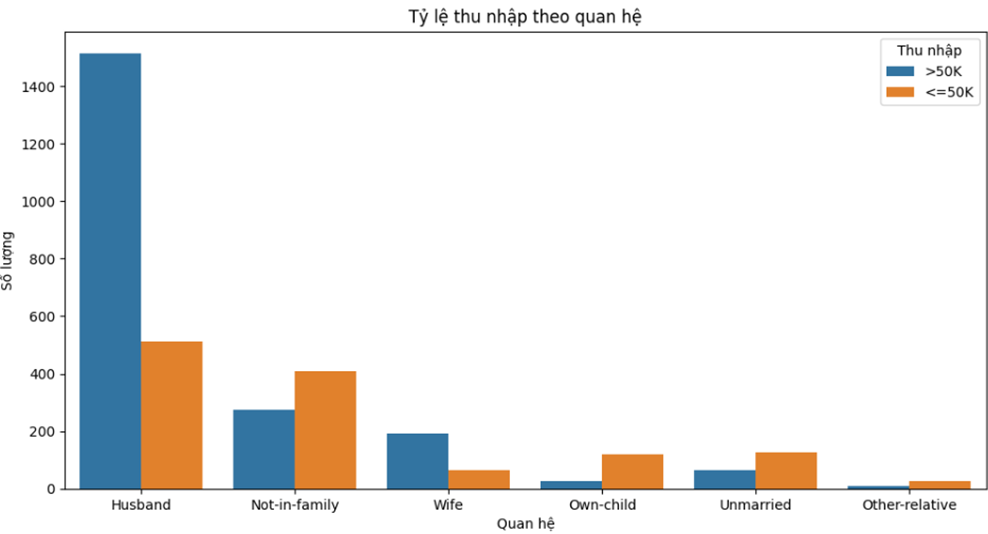
**Nhận xét:**Biểu đồ cho thấy sự phân bố thu nhập của các nhóm người dựa trên mối quan hệ của họ. Nhóm có thu nhập cao nhất là vợ/chồng và con ruột, trong khi nhóm có thu nhập thấp nhất là những người không thuộc gia đình. Biểu đồ cũng cho thấy sự chênh lệch đáng kể về thu nhập giữa các nhóm.

## 11.Phân phối của thu nhập (income) trong các nhóm tuổi (age) khác nhau như thế nào?
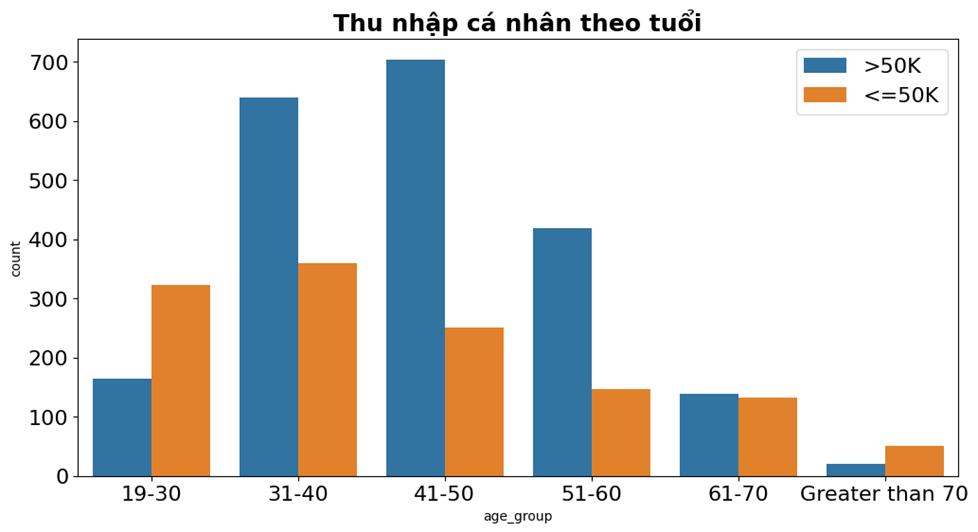
**Nhận xét:**Biểu đồ cột cho thấy sự phân bố thu nhập cá nhân của các nhóm người dựa trên độ tuổi. Nhóm có thu nhập cao nhất là 41-50 tuổi, trong khi nhóm có thu nhập thấp nhất là >70 tuổi. Biểu đồ cũng cho thấy xu hướng thu nhập tăng theo độ tuổi đến 41-50, sau đó giảm dần.

## 12. Phân phối dữ liệu người lao động theo chủng tộc (race) trong bộ dữ liệu như thế nào?
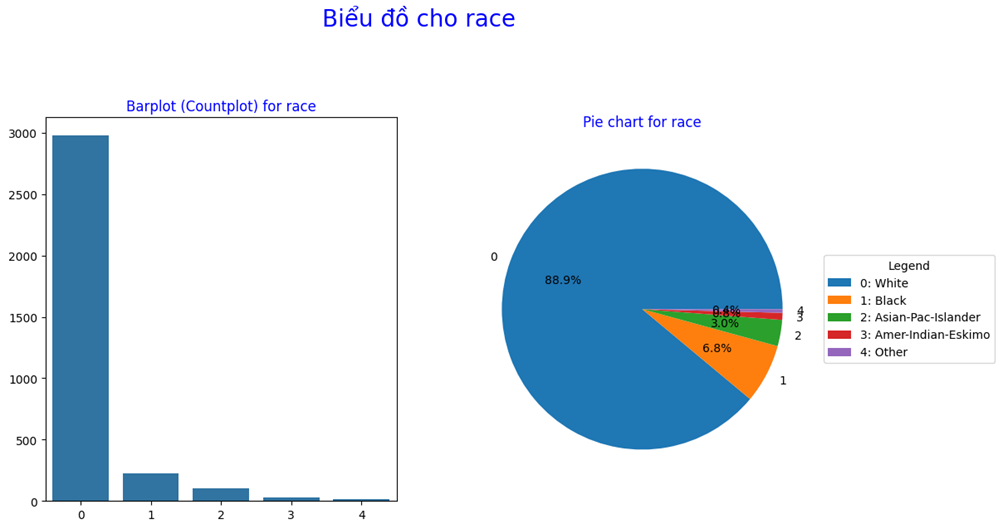
**Nhận xét:**Thông qua biểu đồ trên, ta có thể dễ dàng nhận thấy hầu hết người lao động đều người da trắng khi chiếm tới gần 90% trong bộ dữ liệu.

## 13.Phân phối dữ liệu số giờ làm việc của người lao động trong bộ dữ liệu như thế nào?
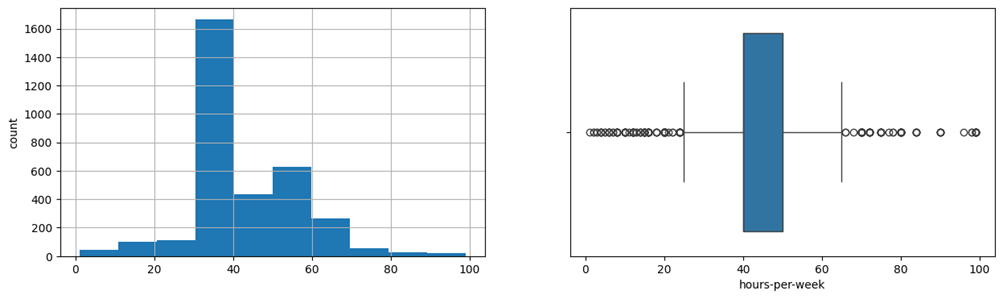
**Nhận xét:**Thông qua biểu đồ, ta nhận thấy số giờ làm việc hàng tuần của người lao động tập trung chủ yếu ở từ 30 đến 70 tiếng.

## 14.Có mối tương quan nào giữa số giờ làm việc hàng tuần (hours-per-week) và thu nhập (income) không?
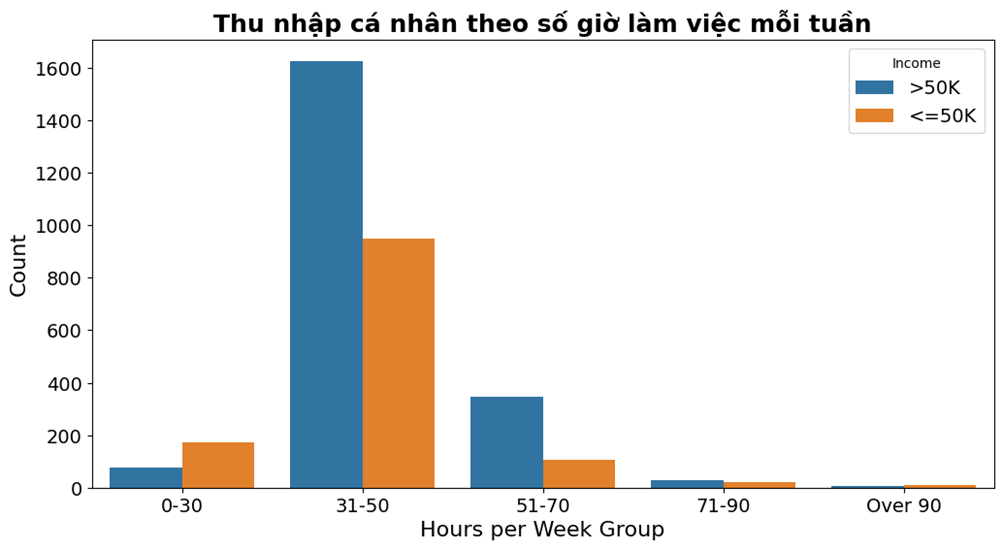
**Nhận xét:**Thông qua biểu đồ, ta có thể thấy dữ liệu về số giờ của người làm việc hàng tuần ở khoảng từ 31 đến 50 tiếng nhiều hơn so với các nhóm khác.

## 15. Phân bố dữ liệu lợi nhuận từ tài sản cá nhân của người lao động như thế nào?
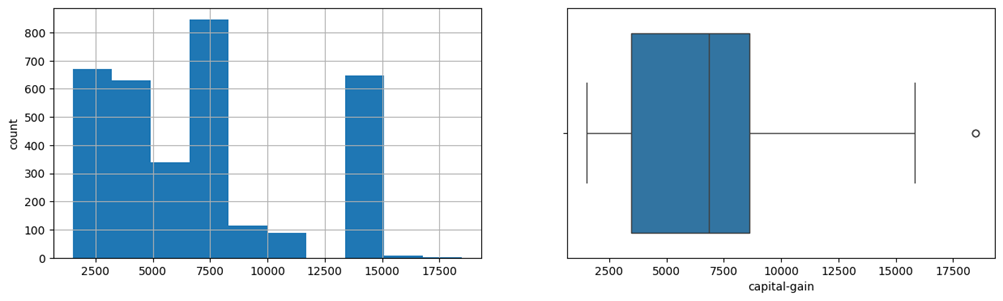
**Nhận xét:**Thông qua biểu đồ, ta thấy hầu hết lợi nhuận từ tài sản cá nhân của người lao động tập trung ở từ trên 2500 và dưới 15000.

## 16.Liệu mối quan hệ hôn nhân có ảnh hưởng đến số giờ làm việc hàng tuần (hours-per-week) không?
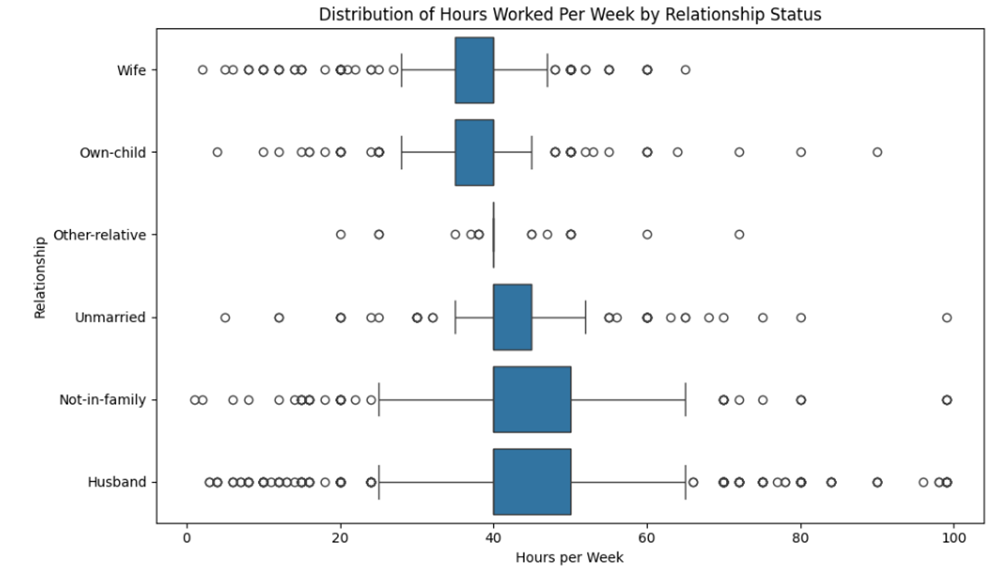
**Nhận xét:**Trong nhóm vợ/chồng được nhìn thấy là làm việc nhiều giờ nhất, trong khi nhóm không thuộc gia đình làm việc ít giờ nhất với trung vị là 30 giờ. Có sự khác biệt đáng chú ý giữa các nhóm, khi nhóm vợ/chồng và con ruột thường làm việc nhiều giờ hơn so với các nhóm khác, trong khi nhóm Unmarried và not-in-family lại có xu hướng làm việc ít giờ hơn. Đặc biệt, nhóm Own-child có sự phân bố rộng hơn, cho thấy đa dạng trong số giờ làm việc của nhóm này. Biểu đồ cũng cho thấy mối liên hệ nhất định giữa tình trạng mối quan hệ và số giờ làm việc.

## 17.Có mối tương quan nào giữa 2 biến educational-num (trình độ học vấn) và capital-gain (lợi nhuận từ tài sản cá nhân hay không)?
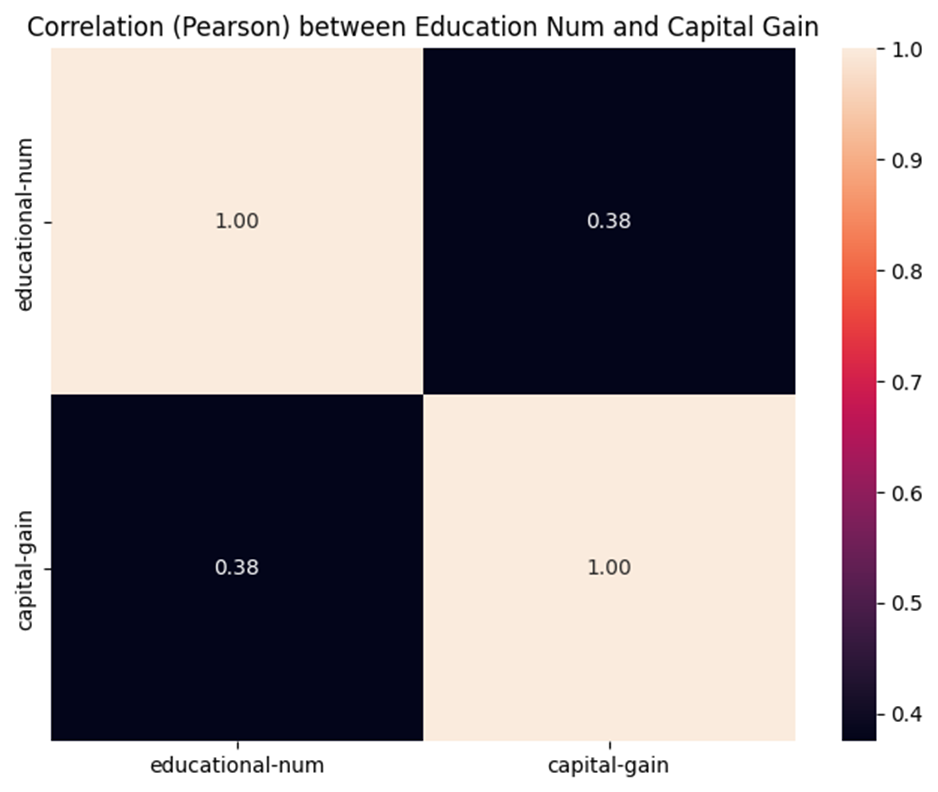

**Nhận xét:**Thông qua ma trận tương quan, chỉ số corrleration ghi nhận mối tương quan dương giữa 2 biến educational-num và capital-gain ở 0.38. Cụ thể hơn, ở chỉ số corrleration 0.38 cho thấy độ tương quan yếu giữa 2 biến.

## 18.Phân phối thu nhập của người lao động được thu thập được trong bộ dữ liệu như thế nào?

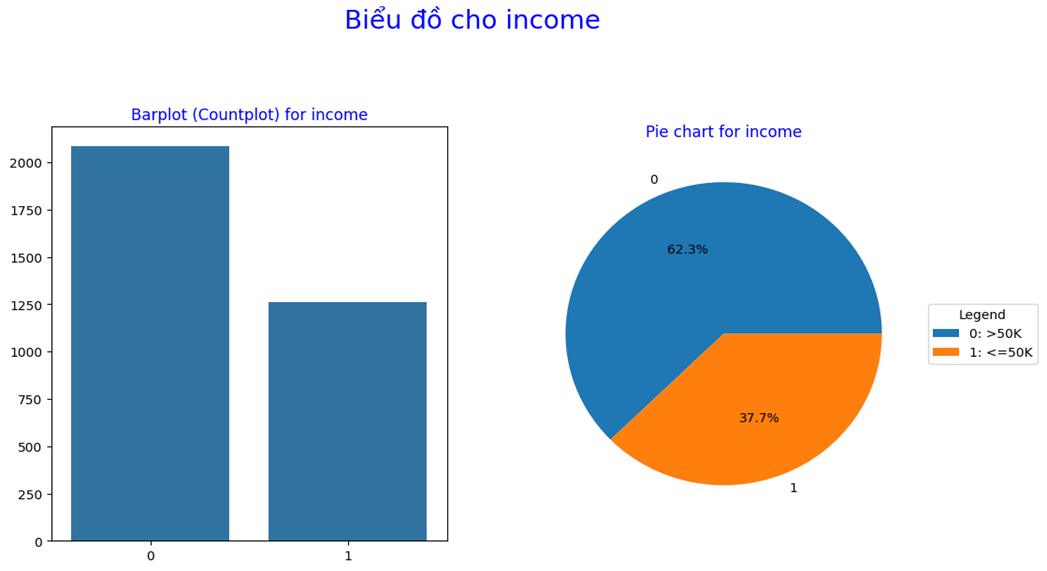
**Nhận xét:**Thông qua biểu đồ ta dễ dàng nhận thấy số lượng người lao động có thu nhập ít hơn 50k cao hơn số lượng người lao động có thu nhập nhiều hơn 50k.

## 19.Có mối tương quan nào giữa 2 biến capital-gain và income hay không?

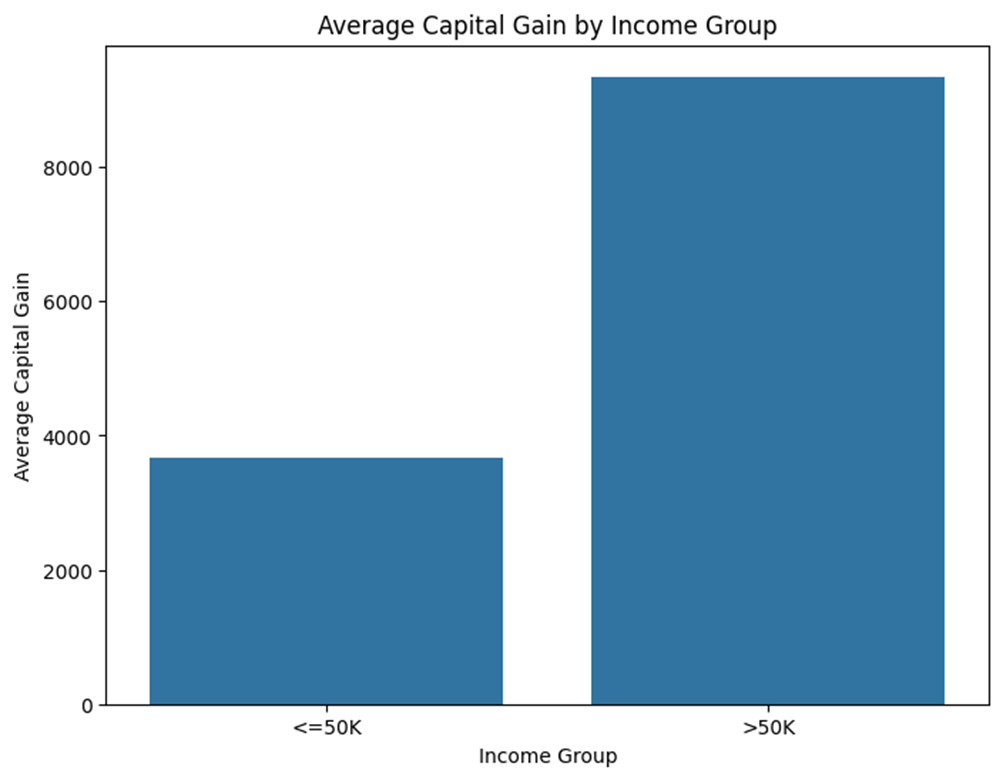
**Nhận xét:**Thông qua biểu đồ cột trên, ta có thể rút ra là lợi nhuận từ tài sản cá nhân càng lớn thì khả năng người lao động đó có thu nhập trên 50k càng cao. Điều này cho thấy giữa hai biến này có mối tương quan dương.

## 20.Phân phối thu nhập của các mối quan hệ gia đình (relationship) khác nhau như thế nào?

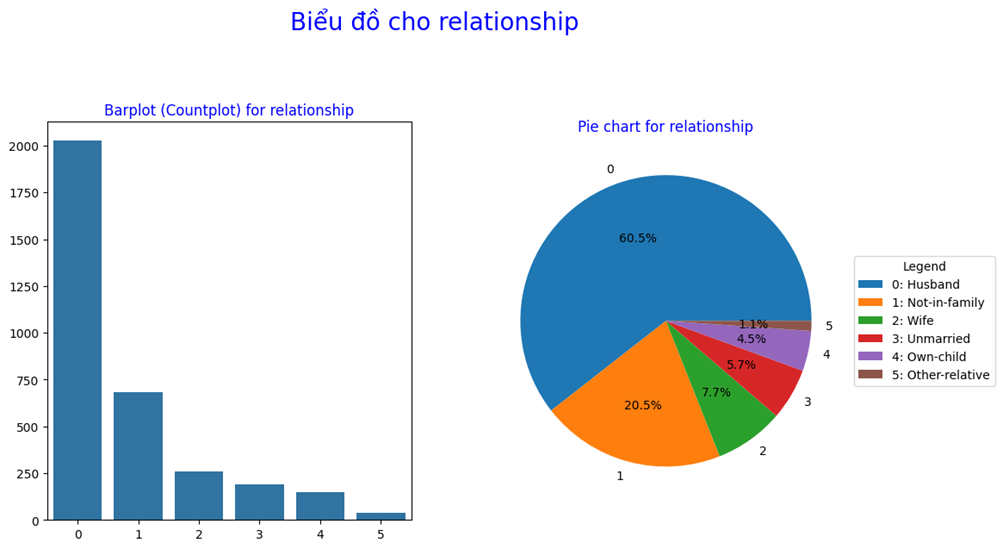
**Nhận xét:**Thông qua biểu đồ Countplot và Pie Chart, ta có thể thấy số lượng người lao động là Chồng chiếm phần lớn trong bộ dữ liệu so với các nhóm người lao động thuộc mối quan hệ khác.

## 21.Phân phối các loại công việc và ngành nghề (work-class) như thế nào?

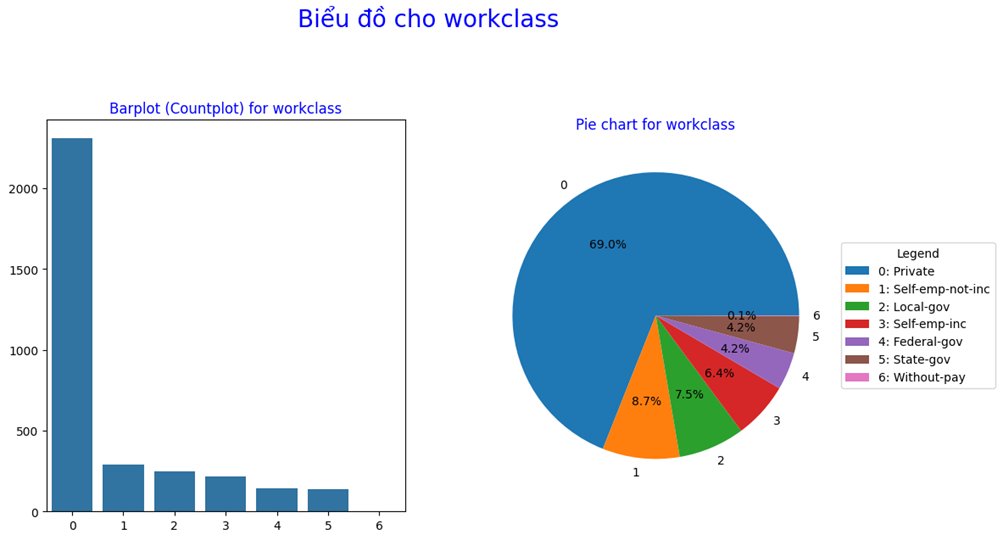
**Nhận xét:**Thông qua biểu đồ, ta có thể thấy loại công việc và ngành nghề của người lao động chủ yếu là private (những người làm việc trong doanh nghiệp tư nhân) với gần 70% dữ liệu.

## 22.Phân phối độ tuổi với các mối quan hệ gia đình như thế nào?

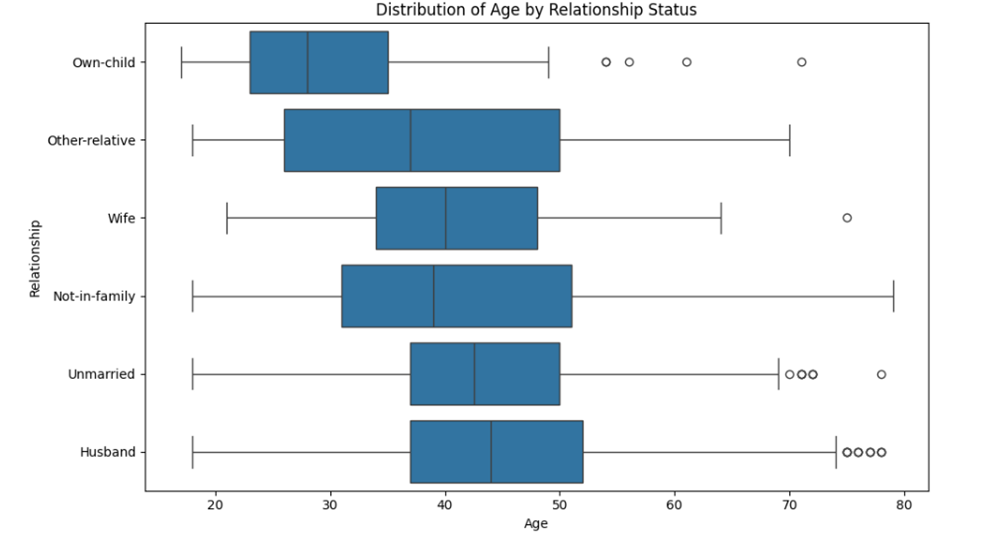
**Nhận xét:**Biểu đồ cho thấy trạng thái mối quan hệ có thể ảnh hưởng đến độ tuổi. Nhóm "Vợ" và "Chồng" có xu hướng có độ tuổi cao hơn các nhóm khác, trong khi nhóm "Con riêng" và "Họ hàng khác" có xu hướng có độ tuổi thấp hơn.

##23.Phân phối dữ liệu giữa số giờ làm việc hàng tuần với mối quan hệ gia đình (relationship) như thế nào?

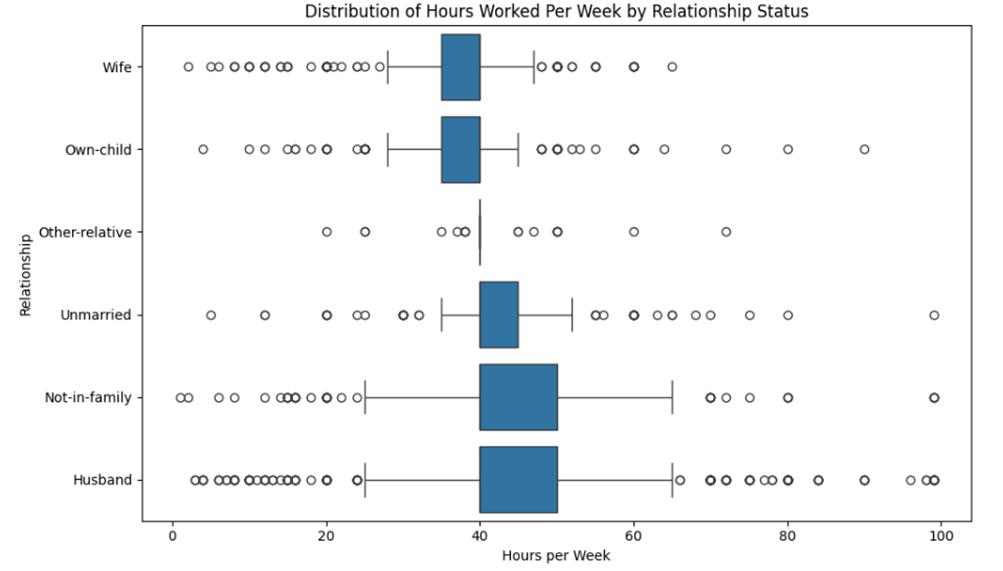
**Nhận xét:**Biểu đồ cho thấy trạng thái mối quan hệ có thể ảnh hưởng đến số giờ làm việc mỗi tuần. Nhóm "Vợ" có xu hướng làm việc nhiều giờ hơn các nhóm khác, trong khi nhóm "Chồng" có xu hướng làm việc ít giờ hơn.

##24.Phân phối lợi nhuận từ tài sản cá nhân (capital-gain) của người lao động của bộ dữ liệu như thế nào?

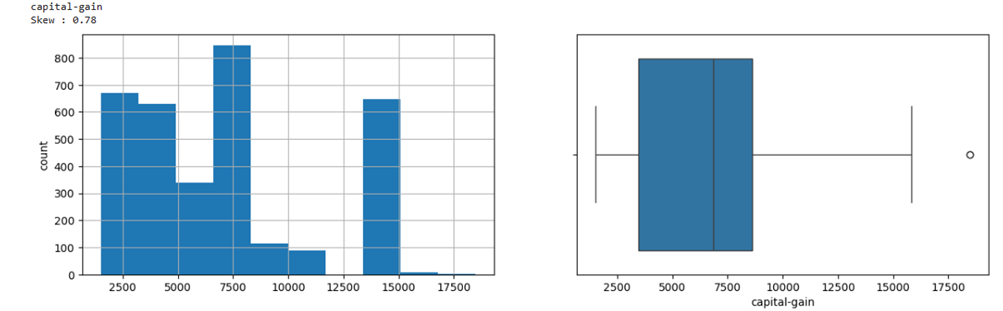
**Nhận xét:** Biểu đồ cho thấy mức độ chênh lệch thu nhập cao trong số những người có thu nhập từ lợi tức đầu tư. Phần lớn người có mức thu nhập thấp, nhưng cũng có một số ít người có thu nhập rất cao.